#### 주제 및 가설 고민 [기각]

- **~~직업별 난이도 차이 확인~~ → 캐릭터 선택 조건 / 뉴비 유입의 요소가 될 수 있을까?**
    - 가설(임시) : 직업 선호도는 육성 난이도에 가장 많은 영향을 받을 것이다. 즉, 유저들은 쉬운 난이도의 직업을 많이 선택할 것이다.
    - 분석방식 : 직업 통계[[메애기 참고](https://meaegi.com/statistics/class)], 직업별 난이도 등의 기본정보(1~5로 수치화)<br>
  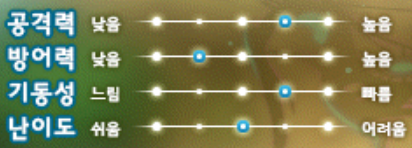

  - 메이플에서 제공하는 난이도 정보가 컨트롤 난이도인지 육성의 난이도인지 종합적인 난이도인지는 아직 파악 X
  - 단순히 게임에서 제공하는 정보로 선호도와의 상관관계를 보일 수 있을까?
  - 그 밖의 캐릭터의 외형이나 스토리, 스킬, 능력치 고점/저점, 전체적인(만렙까지의) 밸런스… 등의 요소가 있을 수 있음
    - 신뢰있는 정보는 아니지만 가볍게만 확인하자면 스킬 이펙트의 경우는 월드컵 게임 순위로 확인(공식 유튜브 영상은 합본이여서 조회수 비교 어려움), 능력치 고점/저점은 API로 수집
    - 게임 정보량의 차이로 인해 뉴비, 복귀유저, 고인물 간의 선호도 차이가 존재할 것이라 추측


- **직업군별 활동 패턴 차이**
    - 가설(임시) : 직업군(전사/마법사/도적 등)에 따라 선호하는 콘텐츠(보스, 유니온, 길드 등)에 차이가 있을 것이다.
    - 분석방식: 직업군별 보스 등의 콘텐츠 랭킹, 스탯 분포 비교
    - ~~보스마다 전투스타일이 어떻게 다른지, 보스별 공략이 쉬운 직업이 있는지 탐색~~ → 보스별 정보 X
    - 추후 새 캐릭터를 내거나 기존 캐릭터 패치 시 콘텐츠의 난이도를 같이 고려할 목적

# **주제**
### ✅ 뉴비 육성 방향성 추천기

# **가설설정 및 시각화**
### 1. 프리셋 관련

▶️ **상당수의 고렙 유저는 프리셋(구성 저장 슬롯) 2번을 보스셋으로 설정할 것이다.**
- 장비/스탯/스킬 등의 2번 프리셋 능력치에 보스 공격력, 방어율 무시 등 보스 공략을 위한 키워드가 많이 포함되어 있고, 프리셋 1번과 3번에는 상대적으로 이런 키워드가 적을 것으로 예상
- 프리셋의 역할 분리는 번호(1~3)에 따라 일정한 경향을 가지지 않을까? (프리셋 구성 패턴을 분석할 수 있지 않을까?)

### 2. 자본과 스탯의 관련성

▶️ **무자본/중자본은 선택과 집중(삼각형), 고자본은 균형잡힌 육각형에 가까운 하이퍼 스탯 분포를 보일 것이다.**
- 여기에서 무자본/중자본/고자본의 기준을 장비로 분류하고자 함 (장비패턴으로 분류)
- 무자본/중자본은 부족한 장비 능력치만큼 특정 스탯을 집중적으로 찍고, 고자본은 장비로 능력치를 챙기는 것이 비교적 충분하므로 다양한 스탯에도 신경쓰는 경향이 있지 않을까? (장비 수준에 따라 하이퍼 스탯의 분포 형태가 다르지 않을까?)
- 아니면 높은 장비 능력치에 더하여 데미지 관련 스탯에만 집중하는 모습을 보일까? ⇒ 고고익선
- 가설이 성립한다면 단순 직업 외에 장비(자본)도 스탯에 영향을 주는 요인이 되리라 생각

### 1. 프리셋 관련(마법사)

In [ ]:
# ✅ 바꿔서 사용할 것
# "ability", "equipment", "hexamatrix", "hexamatrix_stat", "hyper_stat", "linkskill", "set_effect", "symbol", "union_data", "vmatrix"
feature = "equipment"

# 마법사 직업 리스트
jobs = [
    "archmagefp", "archmageil", "battlemage", "bishop", "evan",
    "flamewizard", "illium", "kinesis", "lara", "luminous"
]

# 파일 경로 템플릿 생성
file_template = "/content/drive/MyDrive/data/item/마법사/{job}_{feature}.csv"
file_paths = [file_template.format(job=job, feature=feature) for job in jobs]

# 파일 통합
df_list = []
for path in file_paths:
    job_name = os.path.basename(path).replace(f"_{feature}.csv", "")
    df = pd.read_csv(path)
    df["job"] = job_name
    df_list.append(df)

# feature에 따라 이름 설정
globals()[f"df_{feature}_all"] = pd.concat(df_list, ignore_index=True)

print(f"✅ 통합 완료: df_{feature}_all")
globals()[f"df_{feature}_all"]

✅ 통합 완료: df_equipment_all


,nickname,world,level,job,subclass,preset_number,equipment_part,equipment_slot,item_name,str_total,...,special_ring_level,growth_exp,growth_level,scroll_upgrade,cuttable_count,golden_hammer_flag,scroll_resilience_count,scroll_upgradeable_count,soul_name,soul_option
0,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",1,모자,모자,하이네스 던위치햇,117,...,0,0,0,12,9,적용,0,0,NaN,NaN
1,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",1,얼굴장식,얼굴장식,트와일라이트 마크,109,...,0,0,0,4,6,적용,0,0,NaN,NaN
2,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",1,눈장식,눈장식,블랙빈 마크,106,...,0,0,0,6,10,적용,0,0,NaN,NaN
3,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",1,귀고리,귀고리,마이스터 이어링,131,...,0,0,0,2,10,적용,0,5,NaN,NaN
4,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",1,상의,상의,이글아이 던위치로브,20,...,0,0,0,8,10,적용,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694464,PreludeBflat,스카니아,282,luminous,루미너스,3,포켓 아이템,포켓 아이템,핑크빛 성배,41,...,0,0,0,0,255,미적용,0,0,NaN,NaN
694465,PreludeBflat,스카니아,282,luminous,루미너스,3,기계 심장,기계 심장,페어리 하트,19,...,0,0,0,10,255,적용,0,0,NaN,NaN
694466,PreludeBflat,스카니아,282,luminous,루미너스,3,뱃지,뱃지,크리스탈 웬투스 뱃지,10,...,0,0,0,0,255,미적용,0,0,NaN,NaN
694467,PreludeBflat,스카니아,282,luminous,루미너스,3,엠블렘,엠블렘,골드 히어로즈 엠블렘,10,...,0,0,0,0,255,미적용,0,0,NaN,NaN


In [ ]:
# preset_number 개수 계산
preset_counts = df_equipment_all["preset_number"].value_counts().sort_index()

# preset_number 비율(%) 계산
preset_ratios = df_equipment_all["preset_number"].value_counts(normalize=True).sort_index() * 100

# DataFrame 결합
preset_summary = pd.DataFrame({
    "count": preset_counts,
    "ratio_percent": preset_ratios.round(2)
})

print(preset_summary)

                count  ratio_percent
preset_number                       
1              230248          33.15
2              233043          33.56
3              231178          33.29


보스 키워드 스탯 평균:
    preset  boss_damage_total  ignore_monster_armor_total
0       1           1.576874                    2.068400
1       2           1.560399                    2.039366
2       3           1.555615                    2.041284
보스 키워드 옵션 빈도:
    preset  boss_keyword_text_count
0       1                  40619.0
1       2                  40667.0
2       3                  39985.0


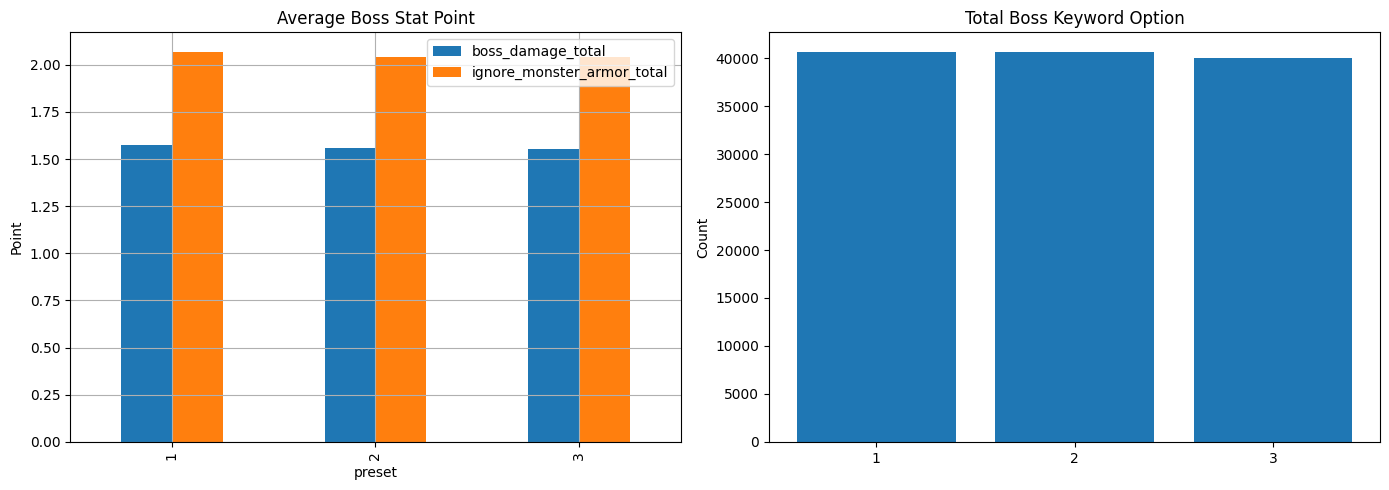

In [ ]:
df_equipment_all.rename(columns={"preset_number": "preset"}, inplace=True)

# (수치형) 스탯 평균 비교
numeric_cols = ["boss_damage_total", "ignore_monster_armor_total"]
preset_numeric_avg = df_equipment_all.groupby("preset")[numeric_cols].mean().reset_index()
print("보스 키워드 스탯 평균:\n", preset_numeric_avg)

# (텍스트형) 보스셋 키워드 수 비교
text_cols = [
    "potential_option_1", "potential_option_2", "potential_option_3",
    "additional_potential_option_1", "additional_potential_option_2", "additional_potential_option_3"
]

# 키워드 포함 여부 함수
def contains_boss_keyword(val):
    if pd.isna(val):
        return 0
    val = str(val)
    return int("보스" in val or "방어율 무시" in val)

df_equipment_all["boss_keyword_text_count"] = (
    df_equipment_all[text_cols]
    .stack()
    .map(contains_boss_keyword)
    .groupby(level=0)
    .sum()
)

# 프리셋별 빈도
preset_text_count = df_equipment_all.groupby("preset")["boss_keyword_text_count"].sum().reset_index()
print("보스 키워드 옵션 빈도:\n", preset_text_count)

# === 시각화 ===
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 수치형 시각화
preset_numeric_avg.set_index("preset")[numeric_cols].plot(kind="bar", ax=axes[0])
axes[0].set_title("Average Boss Stat Point")
axes[0].set_ylabel("Point")
axes[0].grid(True)

# 텍스트형 시각화
axes[1].bar(preset_text_count["preset"].astype(str), preset_text_count["boss_keyword_text_count"])
axes[1].set_title("Total Boss Keyword Option")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

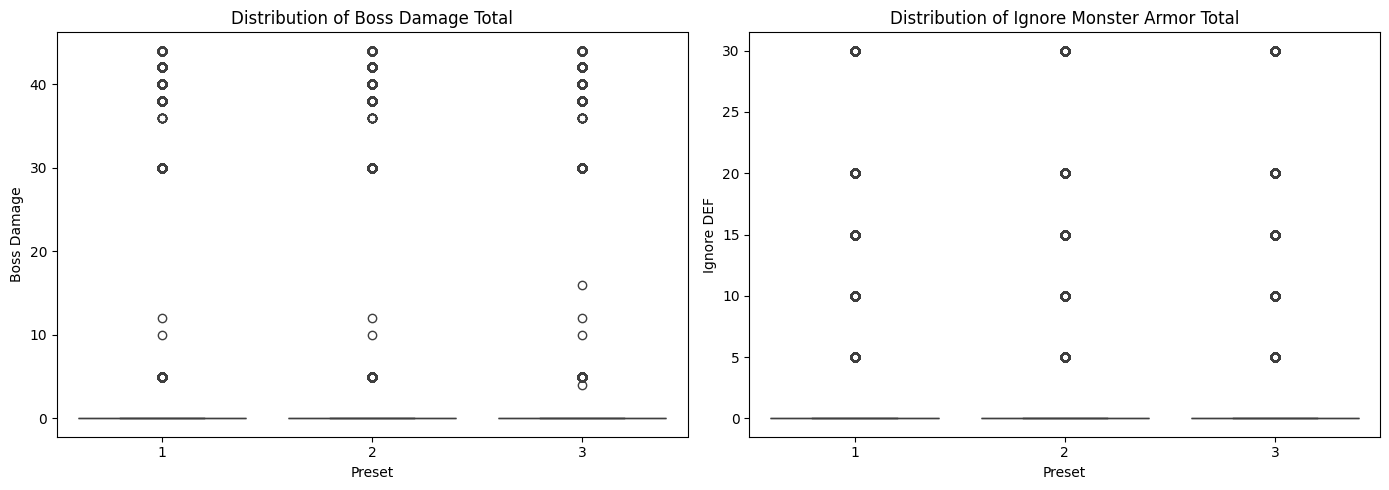

In [ ]:
# 필요한 컬럼 추출
boxplot_df = df_equipment_all[["preset", "boss_damage_total", "ignore_monster_armor_total"]]

# === 시각화 ===
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# boss_damage_total boxplot
sns.boxplot(data=boxplot_df, x="preset", y="boss_damage_total", ax=axes[0])
axes[0].set_title("Distribution of Boss Damage Total")
axes[0].set_xlabel("Preset")
axes[0].set_ylabel("Boss Damage")

# ignore_monster_armor_total boxplot
sns.boxplot(data=boxplot_df, x="preset", y="ignore_monster_armor_total", ax=axes[1])
axes[1].set_title("Distribution of Ignore Monster Armor Total")
axes[1].set_xlabel("Preset")
axes[1].set_ylabel("Ignore DEF")

plt.tight_layout()
plt.show()

In [ ]:
# ✅ 바꿔서 사용할 것
# "ability", "equipment", "hexamatrix", "hexamatrix_stat", "hyper_stat", "linkskill", "set_effect", "symbol", "union_data", "vmatrix"
feature = "hyper_stat"

# 마법사 직업 리스트
jobs = [
    "archmagefp", "archmageil", "battlemage", "bishop", "evan",
    "flamewizard", "illium", "kinesis", "lara", "luminous"
]

# 파일 경로 템플릿 생성
file_template = "/content/drive/MyDrive/data/{feature}/마법사/{job}_{feature}.csv"
file_paths = [file_template.format(job=job, feature=feature) for job in jobs]

# 파일 통합
df_list = []
for path in file_paths:
    job_name = os.path.basename(path).replace(f"_{feature}.csv", "")
    df = pd.read_csv(path)
    df["job"] = job_name
    df_list.append(df)

# feature에 따라 이름 설정
globals()[f"df_{feature}_all"] = pd.concat(df_list, ignore_index=True)

print(f"✅ 통합 완료: df_{feature}_all")
globals()[f"df_{feature}_all"]

✅ 통합 완료: df_hyper_stat_all


,nickname,world,level,job,subclass,preset_number,stat_type,stat_point,stat_level,stat_increase
0,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",1,STR,NaN,0,NaN
1,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",1,DEX,NaN,0,NaN
2,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",1,INT,60.0,7,지력 210 증가
3,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",1,LUK,NaN,0,NaN
4,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",1,HP,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...
509579,PreludeBflat,스카니아,282,luminous,루미너스,3,상태 이상 내성,NaN,0,NaN
509580,PreludeBflat,스카니아,282,luminous,루미너스,3,공격력/마력,NaN,0,NaN
509581,PreludeBflat,스카니아,282,luminous,루미너스,3,획득 경험치,NaN,0,NaN
509582,PreludeBflat,스카니아,282,luminous,루미너스,3,아케인포스,NaN,0,NaN


In [ ]:
# 결측치가 아닌 행만 필터링
valid_rows = df_hyper_stat_all[df_hyper_stat_all["stat_point"].notna()]

# preset_number 개수 계산
preset_counts = valid_rows["preset_number"].value_counts().sort_index()

# preset_number 비율 계산
preset_ratios = valid_rows["preset_number"].value_counts(normalize=True).sort_index() * 100

# 결합
preset_summary = pd.DataFrame({
    "count": preset_counts,
    "ratio_percent": preset_ratios.round(2)
})

print(preset_summary)

               count  ratio_percent
preset_number                      
1              72546          36.74
2              69273          35.08
3              55663          28.19


보스 키워드 하이퍼스탯:
    preset_number  total_stat_point  avg_stat_level
0              1         4212489.0        8.350448
1              2         3056132.0        6.056195
2              3         3290341.0        6.495546


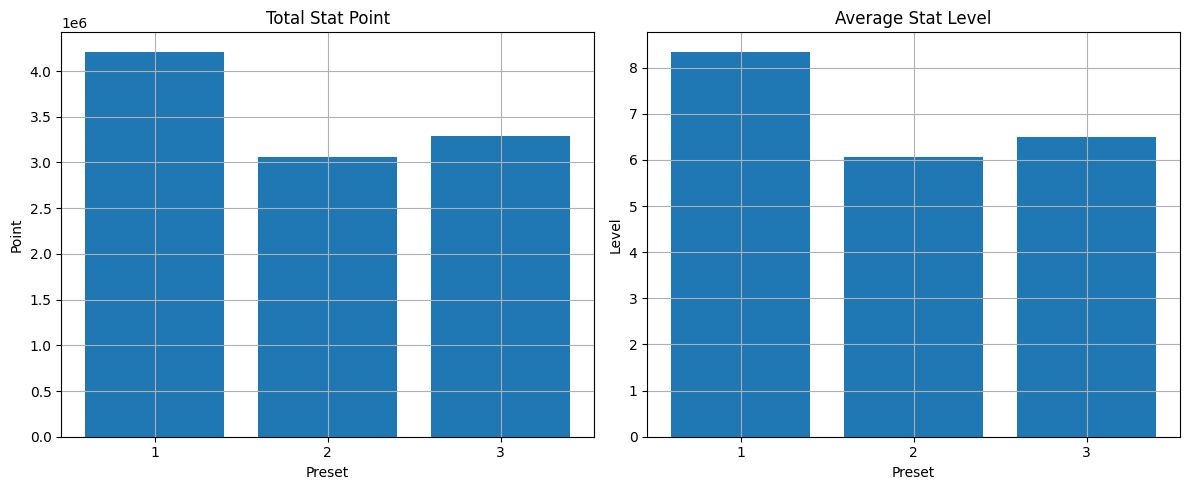

In [ ]:
# "보스" 또는 "방어율 무시"가 포함된 행만 필터링
boss_keywords = "보스|방어율 무시"
df_boss_hyper = df_hyper_stat_all[
    df_hyper_stat_all["stat_type"].str.contains(boss_keywords, na=False)
]

# 프리셋별 stat_point 총합 계산
preset_point_sum = df_boss_hyper.groupby("preset_number")["stat_point"].sum().reset_index()
preset_point_sum.rename(columns={"stat_point": "total_stat_point"}, inplace=True)

# 프리셋별 stat_level 평균 계산
preset_level_avg = df_boss_hyper.groupby("preset_number")["stat_level"].mean().reset_index()
preset_level_avg.rename(columns={"stat_level": "avg_stat_level"}, inplace=True)

# 결과 병합 및 출력
summary = pd.merge(preset_point_sum, preset_level_avg, on="preset_number")
print("보스 키워드 하이퍼스탯:\n", summary)

# === 시각화 ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 총합 포인트 barplot
axes[0].bar(summary["preset_number"].astype(str), summary["total_stat_point"])
axes[0].set_title("Total Stat Point")
axes[0].set_xlabel("Preset")
axes[0].set_ylabel("Point")
axes[0].grid(True)

# 평균 레벨 barplot
axes[1].bar(summary["preset_number"].astype(str), summary["avg_stat_level"])
axes[1].set_title("Average Stat Level")
axes[1].set_xlabel("Preset")
axes[1].set_ylabel("Level")
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# ✅ 바꿔서 사용할 것
# "ability", "equipment", "hexamatrix", "hexamatrix_stat", "hyper_stat", "linkskill", "set_effect", "symbol", "union_data", "vmatrix"
feature = "ability"

# 마법사 직업 리스트
jobs = [
    "archmagefp", "archmageil", "battlemage", "bishop", "evan",
    "flamewizard", "illium", "kinesis", "lara", "luminous"
]

# 파일 경로 템플릿 생성
file_template = "/content/drive/MyDrive/data/{feature}/마법사/{job}_{feature}.csv"
file_paths = [file_template.format(job=job, feature=feature) for job in jobs]

# 파일 통합
df_list = []
for path in file_paths:
    job_name = os.path.basename(path).replace(f"_{feature}.csv", "")
    df = pd.read_csv(path)
    df["job"] = job_name
    df_list.append(df)

# feature에 따라 이름 설정
globals()[f"df_{feature}_all"] = pd.concat(df_list, ignore_index=True)

print(f"✅ 통합 완료: df_{feature}_all")
globals()[f"df_{feature}_all"]

✅ 통합 완료: df_ability_all


,nickname,world,level,job,subclass,preset_number,preset_grade,ability_no,ability_grade,ability_value
0,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",1,레전드리,1,레전드리,버프 스킬의 지속 시간 49% 증가
1,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",1,레전드리,2,유니크,보스 몬스터 공격 시 데미지 9% 증가
2,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",1,레전드리,3,유니크,크리티컬 확률 19% 증가
3,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",2,레전드리,1,레전드리,메소 획득량 20% 증가
4,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",2,레전드리,2,유니크,아이템 드롭률 15% 증가
...,...,...,...,...,...,...,...,...,...,...
89887,PreludeBflat,스카니아,282,luminous,루미너스,2,레전드리,2,유니크,크리티컬 확률 18% 증가
89888,PreludeBflat,스카니아,282,luminous,루미너스,2,레전드리,3,에픽,"LUK 15 증가, INT 8 증가"
89889,PreludeBflat,스카니아,282,luminous,루미너스,3,레전드리,1,레전드리,STR 40 증가
89890,PreludeBflat,스카니아,282,luminous,루미너스,3,레전드리,2,에픽,"INT 17 증가, LUK 9 증가"


In [ ]:
# preset_number 개수 계산
preset_counts = df_ability_all["preset_number"].value_counts().sort_index()

# preset_number 비율(%) 계산
preset_ratios = df_ability_all["preset_number"].value_counts(normalize=True).sort_index() * 100

# DataFrame 결합
preset_summary = pd.DataFrame({
    "count": preset_counts,
    "ratio_percent": preset_ratios.round(2)
})

print(preset_summary)

               count  ratio_percent
preset_number                      
1              29964          33.33
2              29964          33.33
3              29964          33.33


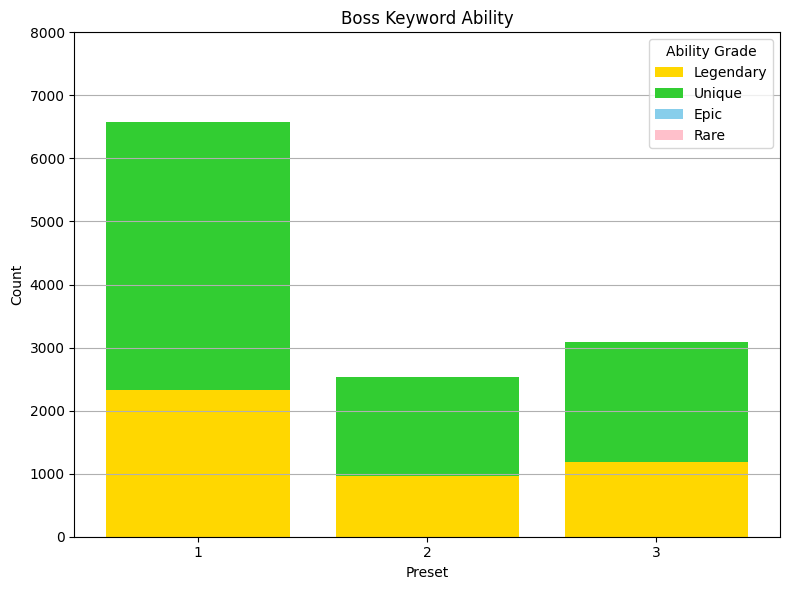

In [ ]:
# '보스' 키워드가 포함된 행 필터링
df_boss_ability = df_ability_all[
    df_ability_all["ability_value"].str.contains("보스", na=False)
]

# 한글 → 영어 매핑 딕셔너리
grade_label_map = {
    "레전드리": "Legendary",
    "유니크": "Unique",
    "에픽": "Epic",
    "레어": "Rare"
}

# 프리셋별 ability_grade 계산
grade_order = ["레전드리", "유니크", "에픽", "레어"]
preset_grade_counts = (
    df_boss_ability.groupby(["preset_number", "ability_grade"])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=grade_order, fill_value=0)
)

preset_grade_counts_english = preset_grade_counts.rename(columns=grade_label_map)

# === 시각화 ===
fig, ax = plt.subplots(figsize=(8, 6))
colors = ["gold", "limegreen", "skyblue", "pink"]

bottom = pd.Series([0] * len(preset_grade_counts_english), index=preset_grade_counts_english.index)
for i, grade in enumerate(preset_grade_counts_english.columns):
    ax.bar(
        preset_grade_counts_english.index.astype(str),
        preset_grade_counts_english[grade],
        bottom=bottom,
        label=grade,
        color=colors[i]
    )
    bottom += preset_grade_counts_english[grade]

ax.set_title("Boss Keyword Ability")
ax.set_xlabel("Preset")
ax.set_ylabel("Count")
ax.set_ylim(0, 8000)
ax.legend(title="Ability Grade")
ax.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# ✅ 바꿔서 사용할 것
# "ability", "equipment", "hexamatrix", "hexamatrix_stat", "hyper_stat", "linkskill", "set_effect", "symbol", "union_data", "vmatrix"
feature = "linkskill"

# 마법사 직업 리스트
jobs = [
    "archmagefp", "archmageil", "battlemage", "bishop", "evan",
    "flamewizard", "illium", "kinesis", "lara", "luminous"
]

# 파일 경로 템플릿 생성
file_template = "/content/drive/MyDrive/data/{feature}/마법사/{job}_{feature}.csv"
file_paths = [file_template.format(job=job, feature=feature) for job in jobs]

# 파일 통합
df_list = []
for path in file_paths:
    job_name = os.path.basename(path).replace(f"_{feature}.csv", "")
    df = pd.read_csv(path)
    df["job"] = job_name
    df_list.append(df)

# feature에 따라 이름 설정
globals()[f"df_{feature}_all"] = pd.concat(df_list, ignore_index=True)

print(f"✅ 통합 완료: df_{feature}_all")
globals()[f"df_{feature}_all"]

✅ 통합 완료: df_linkskill_all


,nickname,world,level,job,subclass,preset_number,skill_name,skill_level,skill_effect
0,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",1,룬 퍼시스턴스,2,해방된 룬의 힘 지속시간 50% 증가
1,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",1,무아,2,"전투 상태가 5초 지속되면 발동되며 최대 5회 중첩가능, 지속시간 5초\n발동 시 ..."
2,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",1,시그너스 블레스,10,"공격력과 마력 25, 상태 이상 내성 15, 모든 속성 내성 15% 증가"
3,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",1,어드벤쳐러 큐리어스,6,"몬스터 컬렉션 등록 확률 35%, 크리티컬 확률 10% 증가"
4,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",1,엘프의 축복,2,사용 시 에우렐로 귀환\n재사용 대기시간 1800초\n추가효과 : 영구적으로 경험치...
...,...,...,...,...,...,...,...,...,...
318834,PreludeBflat,스카니아,282,luminous,루미너스,1,스피릿 오브 프리덤,8,"부활 시 8초 동안 피해를 받지 않음, 맵 이동 시 해제"
318835,PreludeBflat,스카니아,282,luminous,루미너스,1,와일드 레이지,2,데미지 10% 증가
318836,PreludeBflat,스카니아,282,luminous,루미너스,1,이네이트 기프트,2,데미지 5% 증가\n공격 시 100% 확률로 5초 동안 매초 최대 HP/MP의 2%...
318837,PreludeBflat,스카니아,282,luminous,루미너스,1,자신감,2,"방어율 무시 10% 추가, HP가 100%인 몬스터 공격 시 데미지 14% 증가"


In [ ]:
# preset_number 개수 계산
preset_counts = df_linkskill_all["preset_number"].value_counts().sort_index()

# preset_number 비율(%) 계산
preset_ratios = df_linkskill_all["preset_number"].value_counts(normalize=True).sort_index() * 100

# DataFrame 결합
preset_summary = pd.DataFrame({
    "count": preset_counts,
    "ratio_percent": preset_ratios.round(2)
})

preset_summary

,count,ratio_percent
preset_number,,
1,117985,37.00
2,115459,36.21
3,85395,26.78


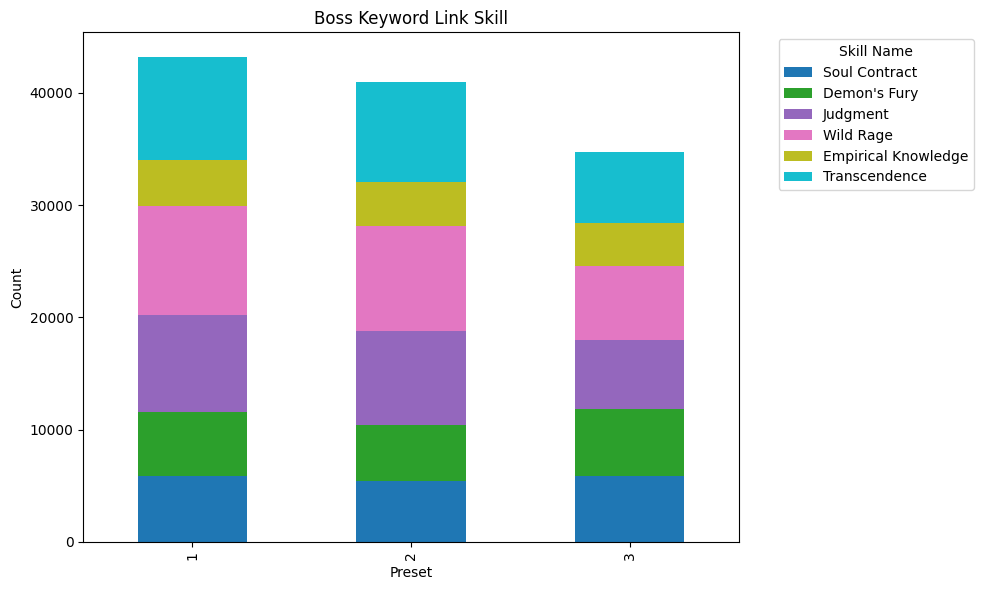

In [ ]:
# 보스 공략 링크스킬 0순위
# 엔젤릭버스터(소울 컨트랙트), 데몬슬레이어(데몬스 퓨리), 키네시스(판단), 데몬어벤져(와일드 레이지), 모험가 마법사(임피리컬 널리지), 아크(무아)
target_skills = [
    "소울 컨트랙트", "데몬스 퓨리", "판단", "와일드 레이지", "임피리컬 널리지", "무아"
]

skill_name_map = {
    "소울 컨트랙트": "Soul Contract",
    "데몬스 퓨리": "Demon's Fury",
    "판단": "Judgment",
    "와일드 레이지": "Wild Rage",
    "임피리컬 널리지": "Empirical Knowledge",
    "무아": "Transcendence"
}

target_skills = list(skill_name_map.keys())

# 타겟 스킬 필터링
df_target_skills = df_linkskill_all[df_linkskill_all["skill_name"].isin(target_skills)]

# 프리셋별 + 스킬별 계산
preset_skill_counts = (
    df_target_skills.groupby(["preset_number", "skill_name"])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=target_skills, fill_value=0)
)

preset_skill_counts_english = preset_skill_counts.rename(columns=skill_name_map)

# === 시각화 ===
preset_skill_counts_english.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="tab10")
plt.title("Boss Keyword Link Skill")
plt.xlabel("Preset")
plt.ylabel("Count")
plt.legend(title="Skill Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# ✅ 바꿔서 사용할 것
# "ability", "equipment", "hexamatrix", "hexamatrix_stat", "hyper_stat", "linkskill", "set_effect", "symbol", "union_data", "vmatrix"
feature = "union_data"

# 마법사 직업 리스트
jobs = [
    "archmagefp", "archmageil", "battlemage", "bishop", "evan",
    "flamewizard", "illium", "kinesis", "lara", "luminous"
]

# 파일 경로 템플릿 생성
file_template = "/content/drive/MyDrive/data/union/마법사/{job}_{feature}.csv"
file_paths = [file_template.format(job=job, feature=feature) for job in jobs]

# 파일 통합
df_list = []
for path in file_paths:
    job_name = os.path.basename(path).replace(f"_{feature}.csv", "")
    df = pd.read_csv(path)
    df["job"] = job_name
    df_list.append(df)

# feature에 따라 이름 설정
globals()[f"df_{feature}_all"] = pd.concat(df_list, ignore_index=True)

print(f"✅ 통합 완료: df_{feature}_all")
globals()[f"df_{feature}_all"]

✅ 통합 완료: df_union_data_all


,nickname,world,level,job,subclass,union_level,union_grade,union_artifact_level,union_rader_preset1_stat,union_rader_preset1_occupied,...,crystal_8_name,crystal_8_opt1,crystal_8_opt2,crystal_8_opt3,champion_preset_1_badges,champion_preset_2_badges,artifact_effect_재사용 대기시간 미적용 확률 증가,artifact_effect_파이널 어택류 스킬의 데미지 증가,champion_preset_3_badges,artifact_effect_소환수 지속시간 증가
0,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",9717.0,그랜드 마스터 유니온 4,52.0,"STR 80 증가, 버프 지속시간 25% 증가, 최대 HP 2000 증가, 최대 M...","크리티컬 데미지 20.00% 증가, STR 5 증가, 일반 몬스터 공격 시 데미지 ...",...,크리스탈 : 핑크빈,올스탯 증가,최대 HP/MP 증가,공격력/마력 증가,"올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가","올스탯 20, 최대 HP/MP 1000 증가",NaN,NaN,NaN,NaN
1,법행,엘리시움,296,archmagefp,"아크메이지(불,독)",10108.0,그랜드 마스터 유니온 5,56.0,"LUK 80 증가, INT 100 증가, 적 공격마다 70%의 확률로 순수 MP의 ...","DEX 5 증가, 크리티컬 데미지 0.50% 증가, 획득 경험치 10.0% 증가, ...",...,크리스탈 : 핑크빈,올스탯 증가,재사용 대기시간 미적용 확률 증가,크리티컬 확률 증가,"올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...","올스탯 20, 최대 HP/MP 1000 증가",10.0,NaN,NaN,NaN
2,서경이,크로아,296,archmagefp,"아크메이지(불,독)",9770.0,그랜드 마스터 유니온 4,56.0,"DEX 100 증가, LUK 80 증가, INT 100 증가, LUK 80 증가, ...","크리티컬 데미지 20.00% 증가, STR 5 증가, LUK 35 증가, INT 3...",...,크리스탈 : 핑크빈,올스탯 증가,파이널 어택류 스킬 데미지 증가,공격력/마력 증가,"올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...","올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...",NaN,10.0,"올스탯 20, 최대 HP/MP 1000 증가",NaN
3,구랙,크로아,296,archmagefp,"아크메이지(불,독)",9828.0,그랜드 마스터 유니온 4,57.0,"스킬 재사용 대기시간 6% 감소, 상태 이상 내성 4 증가, INT 100 증가, ...","버프 지속시간 40% 증가, 최대 HP 250 증가, 크리티컬 데미지 20.00% ...",...,크리스탈 : 핑크빈,파이널 어택류 스킬 데미지 증가,올스탯 증가,공격력/마력 증가,"올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...","올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...",NaN,10.0,"올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...",NaN
4,마산어린이,크로아,295,archmagefp,"아크메이지(불,독)",9406.0,그랜드 마스터 유니온 3,53.0,"DEX 80 증가, 방어율 무시 6% 증가, LUK 80 증가, 공격력/마력 25 ...","버프 지속시간 40% 증가, 최대 HP 250 증가, 크리티컬 데미지 20.00% ...",...,크리스탈 : 핑크빈,파이널 어택류 스킬 데미지 증가,메소 획득량 증가,아이템 드롭률 증가,"올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...",NaN,NaN,9.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,김깜몬,베라,282,luminous,루미너스,8797.0,그랜드 마스터 유니온 1,46.0,"DEX 80 증가, INT 100 증가, 최대 HP 2000 증가, DEX 80 증...","크리티컬 데미지 20.00% 증가, STR 5 증가, DEX 5 증가, 크리티컬 확...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9995,트리트민,루나,282,luminous,루미너스,8799.0,그랜드 마스터 유니온 1,45.0,"경험치 획득량 10% 증가, DEX 80 증가, 메소 획득량 4% 증가, INT 8...","버프 지속시간 15% 증가, 최대 HP 250 증가, 크리티컬 데미지 20.00% ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,노른판타지,엘리시움,282,luminous,루미너스,8917.0,그랜드 마스터 유니온 2,49.0,"스킬 재사용 대기시간 5% 감소, INT 100 증가, 메소 획득량 4% 증가, 경...","크리티컬 데미지 20.00% 증가, 마력 5 증가, 크리티컬 확률 7% 증가, 버프...",...,NaN,NaN,NaN,NaN,"올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가",NaN,10.0,NaN,NaN,NaN
9997,쑤쟐,루나,282,luminous,루미너스,9905.0,그랜드 마스터 유니온 4,50.0,"STR 100 증가, 버프 지속시간 20% 증가, 최대 MP 6% 증가, STR 8...","상태 이상 내성 1 증가, DEX 5 증가, 크리티컬 데미지 20.00% 증가, 획...",...,크리스탈 : 핑크빈,재사용 대기시간 미적용 확률 증가,크리티컬 확률 증가,메소 획득량 증가,"올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가","올스탯 20, 최대 HP/MP 1000 증가",8.0,NaN,NaN,NaN


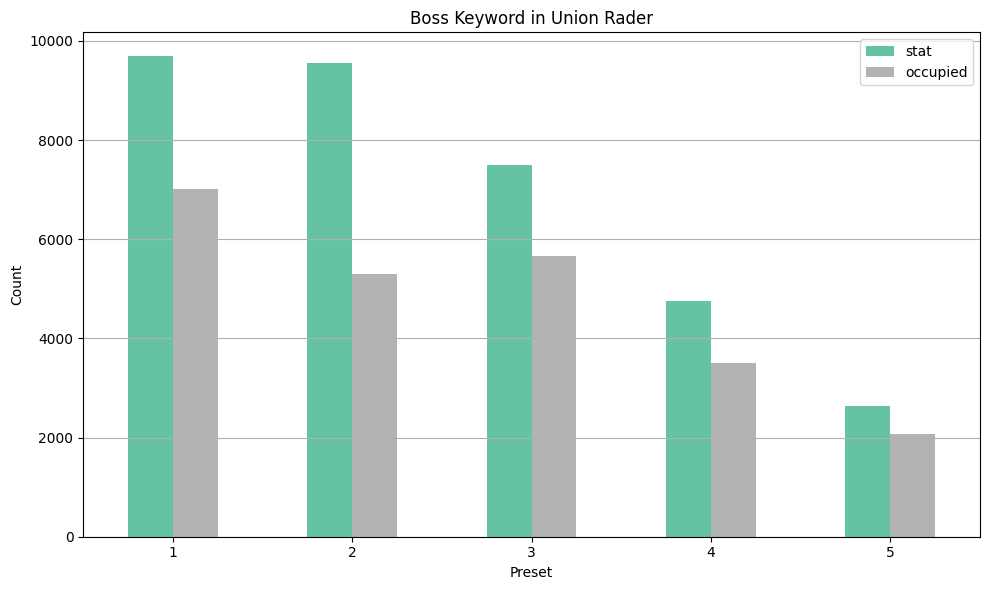

In [ ]:
# 분석 대상 컬럼
stat_cols = [f"union_rader_preset{i}_stat" for i in range(1, 6)]
occupied_cols = [f"union_rader_preset{i}_occupied" for i in range(1, 6)]

# '보스' 키워드 포함 여부 프리셋별 확인
boss_counts = {}
for col in stat_cols + occupied_cols:
    boss_counts[col] = df_union_data_all[col].astype(str).str.contains("보스", na=False).sum()

# 프리셋별 결과
result = pd.DataFrame({
    "preset_number": list(range(1, 6)),
    "stat": [boss_counts[col] for col in stat_cols],
    "occupied": [boss_counts[col] for col in occupied_cols]
})

# === 시각화 ===
ax = result.set_index("preset_number").plot(
    kind="bar",
    stacked=False,
    figsize=(10, 6),
    colormap="Set2"
)

plt.title("Boss Keyword in Union Rader")
plt.xlabel("Preset")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
print("📌 stat_cols 결측치 개수:")
print(df_union_data_all[stat_cols].isna().sum())
print()

print("📌 occupied_cols 결측치 개수:")
print(df_union_data_all[occupied_cols].isna().sum())

📌 stat_cols 결측치 개수:
union_rader_preset1_stat     102
union_rader_preset2_stat     170
union_rader_preset3_stat    2102
union_rader_preset4_stat    5020
union_rader_preset5_stat    7190
dtype: int64

📌 occupied_cols 결측치 개수:
union_rader_preset1_occupied     102
union_rader_preset2_occupied     170
union_rader_preset3_occupied    2102
union_rader_preset4_occupied    5020
union_rader_preset5_occupied    7190
dtype: int64


### 2. 장비-스탯 관련(마법사)

In [ ]:
# ✅ 바꿔서 사용할 것
# "ability", "equipment", "hexamatrix", "hexamatrix_stat", "hyper_stat", "linkskill", "set_effect", "symbol", "union_data", "vmatrix"
feature = "set_effect"

# 마법사 직업 리스트
jobs = [
    "archmagefp", "archmageil", "battlemage", "bishop", "evan",
    "flamewizard", "illium", "kinesis", "lara", "luminous"
]

# 파일 경로 템플릿 생성
file_template = "/content/drive/MyDrive/data/set_effect/마법사/{job}_{feature}.csv"
file_paths = [file_template.format(job=job, feature=feature) for job in jobs]

# 파일 통합
df_list = []
for path in file_paths:
    job_name = os.path.basename(path).replace(f"_{feature}.csv", "")
    df = pd.read_csv(path)
    df["job"] = job_name
    df_list.append(df)

# feature에 따라 이름 설정
globals()[f"df_{feature}_all"] = pd.concat(df_list, ignore_index=True)

print(f"✅ 통합 완료: df_{feature}_all")
globals()[f"df_{feature}_all"]

✅ 통합 완료: df_set_effect_all


,nickname,world,level,job,subclass,set_name,total_set_count,set_option
0,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",보스 장신구 세트,3,"올스탯 : +10, 최대 HP : +5%, 최대 MP : +5%, 공격력 : +5,..."
1,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",칠흑의 보스 세트,2,"올스탯 : +10, 최대 HP : +250, 공격력 : +10, 마력 : +10, ..."
2,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",루타비스 세트(마법사),4,"INT : +20, LUK : +20, 최대 HP : +1000, 최대 MP : +..."
3,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",별하늘 난초 세트,5,"올스탯 : +5, 최대 HP : +250, 최대 MP : +250, 공격력 : +3..."
4,곤주,엘리시움,297,archmagefp,"아크메이지(불,독)",앱솔랩스 세트(마법사),5,"최대 HP : +1500, 최대 MP : +1500, 공격력 : +20, 마력 : ..."
...,...,...,...,...,...,...,...,...
54195,PreludeBflat,스카니아,282,luminous,루미너스,루타비스 세트(마법사),2,"INT : +20, LUK : +20, 최대 HP : +1000, 최대 MP : +..."
54196,PreludeBflat,스카니아,282,luminous,루미너스,쁘띠 초롱나비 세트,1,<나비 정원의 빛 Lv.1> 스킬 사용 가능
54197,PreludeBflat,스카니아,282,luminous,루미너스,여명의 보스 세트,4,"올스탯 : +10, 최대 HP : +250, 공격력 : +10, 마력 : +10, ..."
54198,PreludeBflat,스카니아,282,luminous,루미너스,별하늘 난초 세트,5,"올스탯 : +5, 최대 HP : +250, 최대 MP : +250, 공격력 : +3..."


In [ ]:
# 1. 평균 스타포스
avg_starforce_all = df_equipment_all.groupby("nickname")["starforce"].mean().reset_index()
avg_starforce_all.rename(columns={"starforce": "avg_starforce"}, inplace=True)

# 2. 기본 캐릭터 정보
basic_info_all = df_equipment_all.groupby("nickname").first().reset_index()[
    ["nickname", "world", "level", "job", "subclass"]
]

# 3. 세트 점수 계산
set_weight = {
    "여명": 1,
    "칠흑": 2,
    "루타비스": 1,
    "카루타": 1,
    "아케인": 2,
    "에테르넬": 3
}

def classify_weighted_set(name):
    if pd.isna(name):
        return None
    for keyword in set_weight:
        if keyword in name:
            return keyword
    return None

df_set_effect_all["set_category"] = df_set_effect_all["set_name"].apply(classify_weighted_set)
df_set_effect_all["score_per_set"] = df_set_effect_all["set_category"].map(set_weight)
df_set_effect_all["set_score"] = df_set_effect_all["score_per_set"] * df_set_effect_all["total_set_count"]

set_score_all = df_set_effect_all.groupby("nickname")["set_score"].sum().reset_index()
set_score_all["set_score"] = set_score_all["set_score"].fillna(0).astype(int)

# 4. 하이퍼스탯 요약 (프리셋별 → 평균)
filtered_hyper = df_hyper_stat_all[~df_hyper_stat_all["stat_point"].isna()][
    ["nickname", "preset_number", "stat_type"]
].drop_duplicates()

stat_type_count = filtered_hyper.groupby(["nickname", "preset_number"]).size().reset_index(name="stat_type_count")
stat_point_std = df_hyper_stat_all.groupby(["nickname", "preset_number"])["stat_point"].std().reset_index(name="stat_point_std")
hyper_stats = pd.merge(stat_type_count, stat_point_std, on=["nickname", "preset_number"])

hyper_stats_wide = hyper_stats.pivot(index='nickname', columns='preset_number')
hyper_stats_wide.columns = [f"{stat}_{preset}" for stat, preset in hyper_stats_wide.columns]
hyper_stats_wide.reset_index(inplace=True)

hyper_stats_wide.rename(columns={
    "stat_type_count_1": "stat_type_count1",
    "stat_type_count_2": "stat_type_count2",
    "stat_type_count_3": "stat_type_count3",
    "stat_point_std_1": "stat_point_std1",
    "stat_point_std_2": "stat_point_std2",
    "stat_point_std_3": "stat_point_std3"
}, inplace=True)

hyper_stats_wide["stat_type_count_mean"] = hyper_stats_wide[[
    "stat_type_count1", "stat_type_count2", "stat_type_count3"
]].mean(axis=1)

hyper_stats_wide["stat_point_std_mean"] = hyper_stats_wide[[
    "stat_point_std1", "stat_point_std2", "stat_point_std3"
]].mean(axis=1)

# 5. 통합
result_df_all = basic_info_all.merge(avg_starforce_all, on="nickname", how="left")
result_df_all = result_df_all.merge(set_score_all, on="nickname", how="left")
result_df_all = result_df_all.merge(hyper_stats_wide, on="nickname", how="left")

# 6. 투자 지표 계산
result_df_all["investment_index"] = result_df_all["set_score"] * result_df_all["avg_starforce"]

# 출력
result_df_all.head()

,nickname,world,level,job,subclass,avg_starforce,set_score,stat_type_count1,stat_type_count2,stat_type_count3,stat_point_std1,stat_point_std2,stat_point_std3,stat_type_count_mean,stat_point_std_mean,investment_index
0,0125210,루나,289,archmagefp,"아크메이지(불,독)",3.750000,0.0,8.0,5.0,6.0,187.534187,197.275189,223.852630,6.333333,202.887335,0.000000
1,07진우불독,스카니아,290,archmagefp,"아크메이지(불,독)",11.166667,4.0,7.0,8.0,6.0,24.567691,209.482313,245.430234,7.000000,159.826746,44.666667
2,08이미르,엘리시움,286,evan,에반,11.500000,16.0,9.0,8.0,7.0,203.427506,168.972525,56.378821,8.000000,142.926284,184.000000
3,0exia099,크로아,285,battlemage,배틀메이지,12.236111,18.0,7.0,7.0,NaN,208.197708,165.412471,NaN,7.000000,186.805090,220.250000
4,0구쨩0구,루나,285,evan,에반,9.777778,17.0,8.0,7.0,7.0,65.297123,201.706647,168.054980,7.333333,145.019583,166.222222


In [ ]:
# 1. set_score이 0인 경우 1로 대체
result_df_all["set_score"] = result_df_all["set_score"].apply(lambda x: 1 if x == 0 else x)

# 2. investment_index 재계산
result_df_all["investment_index"] = result_df_all["set_score"] * result_df_all["avg_starforce"]

# 3. count 관련 컬럼은 정수화
count_cols = ["stat_type_count1", "stat_type_count2", "stat_type_count3", "stat_type_count_mean"]
for col in count_cols:
    result_df_all[col] = result_df_all[col].fillna(0).astype(int)

# 4. 나머지 수치형 컬럼은 소수점 1자리로 반올림
float_cols = [
    "avg_starforce", "stat_point_std1", "stat_point_std2", "stat_point_std3",
    "stat_point_std_mean", "investment_index"
]
for col in float_cols:
    result_df_all[col] = result_df_all[col].round(1)

# 5. investment_index를 set_score 오른쪽에 위치하도록 재정렬
cols = list(result_df_all.columns)
if "set_score" in cols and "investment_index" in cols:
    set_idx = cols.index("set_score")
    cols.remove("investment_index")
    cols.insert(set_idx + 1, "investment_index")
    result_df_all = result_df_all[cols]

# 출력
result_df_all

,nickname,world,level,job,subclass,avg_starforce,set_score,investment_index,stat_type_count1,stat_type_count2,stat_type_count3,stat_point_std1,stat_point_std2,stat_point_std3,stat_type_count_mean,stat_point_std_mean
0,0125210,루나,289,archmagefp,"아크메이지(불,독)",3.8,1.0,3.8,8,5,6,187.5,197.3,223.9,6,202.9
1,07진우불독,스카니아,290,archmagefp,"아크메이지(불,독)",11.2,4.0,44.8,7,8,6,24.6,209.5,245.4,7,159.8
2,08이미르,엘리시움,286,evan,에반,11.5,16.0,184.0,9,8,7,203.4,169.0,56.4,8,142.9
3,0exia099,크로아,285,battlemage,배틀메이지,12.2,18.0,219.6,7,7,0,208.2,165.4,NaN,7,186.8
4,0구쨩0구,루나,285,evan,에반,9.8,17.0,166.6,8,7,7,65.3,201.7,168.1,7,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,힙통령,루나,283,illium,일리움,2.8,16.0,44.8,7,8,6,222.3,179.0,190.8,7,197.4
9982,힛쌔,루나,292,bishop,비숍,14.9,28.0,417.2,6,7,6,220.5,178.6,161.4,6,186.8
9983,힝셔,스카니아,282,battlemage,배틀메이지,11.9,20.0,238.0,8,7,8,178.7,218.9,169.0,7,188.9
9984,힝은비,스카니아,285,kinesis,키네시스,11.5,37.0,425.5,8,8,8,158.0,98.2,49.9,8,102.0


In [ ]:
# 전체 마법사 유저 수 확인용
df_equipment_all["nickname"].nunique()

9986

In [ ]:
result_df_all["investment_index"].min(), result_df_all["investment_index"].max()

(0.0, 805.0)

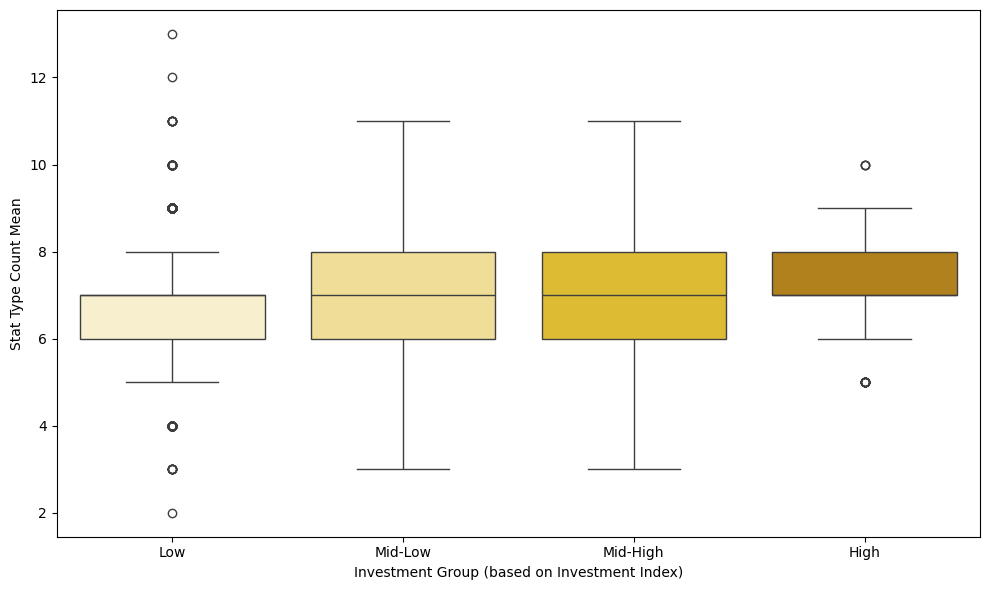

In [ ]:
# 1. 수치 기반 구간 정의 (0 ~ 805 기준)
bins = [0, 150, 300, 500, float("inf")]
labels = ["Low", "Mid-Low", "Mid-High", "High"]

# 2. 구간화
result_df_all["investment_group"] = pd.cut(
    result_df_all["investment_index"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# 3. 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=result_df_all,
    x="investment_group",
    y="stat_type_count_mean",
    hue="investment_group",
    palette=yellow_palette,
    legend=False
)

plt.xlabel("Investment Group (based on Investment Index)")
plt.ylabel("Stat Type Count Mean")
plt.tight_layout()
plt.show()

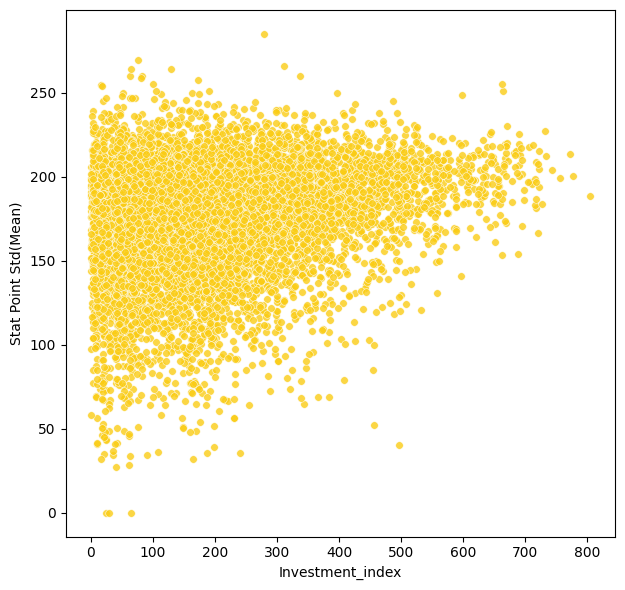

In [ ]:
plt.figure(figsize=(12, 6))

# 스타일 설정
scatter_kws = {
    "color": "#FACC15",  # 예쁜 노란색 (tailwind yellow-400)
    "s": 30,              # 점 크기
    "alpha": 0.8          # 약간의 투명도
}

# 산점도 - 투자 지표 vs 스탯 분산 평균
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=result_df_all,
    x="investment_index",
    y="stat_point_std_mean",
    **scatter_kws
)
plt.xlabel("Investment_index")
plt.ylabel("Stat Point Std (Mean)")

plt.tight_layout()
plt.show()

### 1. 프리셋 관련(전체)

In [ ]:
# 장비(item/equipment) 데이터 모두 불러오기
# "equipment"(item), "hyper_stat", "ability","union_data"(union), "linkskill"

# 상위 폴더 경로
root_dir = "/content/drive/MyDrive/data/item" # 수정

# 하위 모든 CSV 탐색
all_csv_files = glob.glob(os.path.join(root_dir, "*/*.csv"))

df_list = []
for file in all_csv_files:
    df = pd.read_csv(file)
    folder_name = os.path.basename(os.path.dirname(file))
    job_file = os.path.basename(file).replace("_equipment.csv", "") # 수정
    df["job_group"] = folder_name
    df_list.append(df)

# 전체 통합
equipment_df = pd.concat(df_list, ignore_index=True) # 수정

In [ ]:
equipment_df

,nickname,world,level,job,subclass,preset_number,equipment_part,equipment_slot,item_name,str_total,...,growth_exp,growth_level,scroll_upgrade,cuttable_count,golden_hammer_flag,scroll_resilience_count,scroll_upgradeable_count,soul_name,soul_option,job_group
0,별왕,크로아,296,카데나,카데나,1,모자,모자,에테르넬 시프반다나,157,...,0,0,12,7,적용,0,0,NaN,NaN,도적
1,별왕,크로아,296,카데나,카데나,1,상의,상의,에테르넬 시프셔츠,132,...,0,0,8,8,적용,0,0,NaN,NaN,도적
2,별왕,크로아,296,카데나,카데나,1,하의,하의,에테르넬 시프팬츠,128,...,0,0,8,8,적용,0,0,NaN,NaN,도적
3,별왕,크로아,296,카데나,카데나,1,신발,신발,아케인셰이드 시프슈즈,0,...,0,0,8,5,적용,0,0,NaN,NaN,도적
4,별왕,크로아,296,카데나,카데나,1,장갑,장갑,아케인셰이드 시프글러브,116,...,0,0,8,5,적용,0,0,NaN,NaN,도적
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193710,PreludeBflat,스카니아,282,루미너스,루미너스,3,포켓 아이템,포켓 아이템,핑크빛 성배,41,...,0,0,0,255,미적용,0,0,NaN,NaN,마법사
3193711,PreludeBflat,스카니아,282,루미너스,루미너스,3,기계 심장,기계 심장,페어리 하트,19,...,0,0,10,255,적용,0,0,NaN,NaN,마법사
3193712,PreludeBflat,스카니아,282,루미너스,루미너스,3,뱃지,뱃지,크리스탈 웬투스 뱃지,10,...,0,0,0,255,미적용,0,0,NaN,NaN,마법사
3193713,PreludeBflat,스카니아,282,루미너스,루미너스,3,엠블렘,엠블렘,골드 히어로즈 엠블렘,10,...,0,0,0,255,미적용,0,0,NaN,NaN,마법사


In [ ]:
# preset_number 개수 계산
preset_counts = equipment_df["preset_number"].value_counts().sort_index()

# preset_number 비율(%) 계산
preset_ratios = equipment_df["preset_number"].value_counts(normalize=True).sort_index() * 100

# DataFrame 결합
preset_summary = pd.DataFrame({
    "count": preset_counts,
    "ratio_percent": preset_ratios.round(2)
})

preset_summary

,count,ratio_percent
preset_number,,
1,1058700,33.15
2,1072004,33.57
3,1063011,33.28


보스 키워드 스탯 평균:
    preset  boss_damage_total  ignore_monster_armor_total
0       1           1.659018                    2.075338
1       2           1.638922                    2.041480
2       3           1.638405                    2.048502
보스 키워드 옵션 빈도:
    preset  boss_keyword_text_count
0       1                 188191.0
1       2                 188186.0
2       3                 185495.0


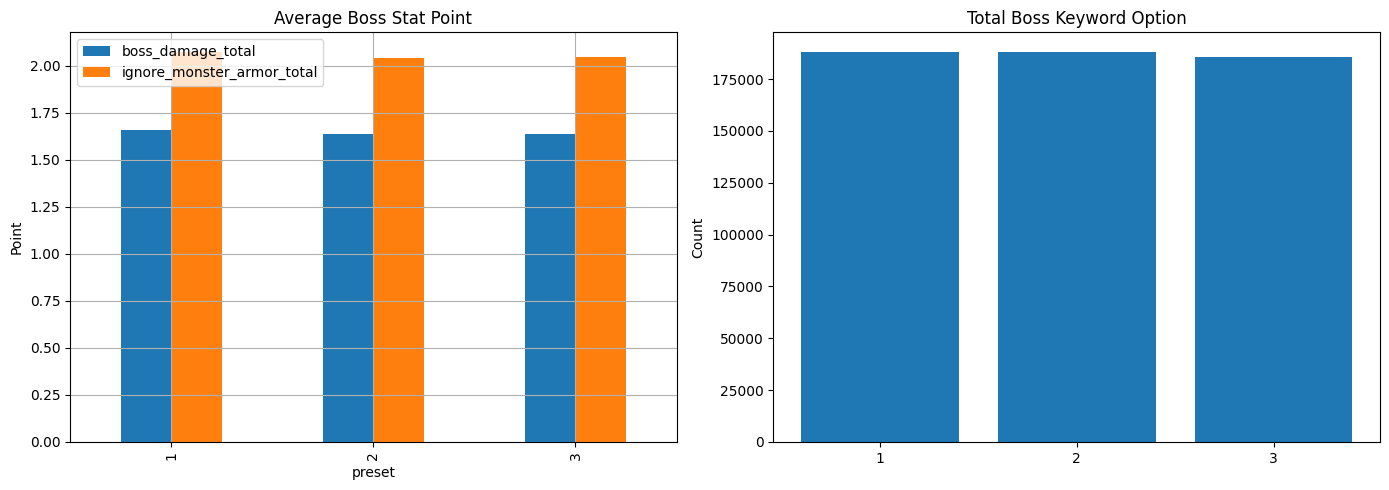

In [ ]:
equipment_df.rename(columns={"preset_number": "preset"}, inplace=True)

# (수치형) 스탯 평균 비교
numeric_cols = ["boss_damage_total", "ignore_monster_armor_total"]
preset_numeric_avg = equipment_df.groupby("preset")[numeric_cols].mean().reset_index()
print("보스 키워드 스탯 평균:\n", preset_numeric_avg)

# (텍스트형) 보스셋 키워드 수 비교
text_cols = [
    "potential_option_1", "potential_option_2", "potential_option_3",
    "additional_potential_option_1", "additional_potential_option_2", "additional_potential_option_3"
]

# 키워드 포함 여부 함수
def contains_boss_keyword(val):
    if pd.isna(val):
        return 0
    val = str(val)
    return int("보스" in val or "방어율 무시" in val)

equipment_df["boss_keyword_text_count"] = (
    equipment_df[text_cols]
    .stack()
    .map(contains_boss_keyword)
    .groupby(level=0)
    .sum()
)

# 프리셋별 빈도
preset_text_count = equipment_df.groupby("preset")["boss_keyword_text_count"].sum().reset_index()
print("보스 키워드 옵션 빈도:\n", preset_text_count)

# === 시각화 ===
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 수치형 시각화
preset_numeric_avg.set_index("preset")[numeric_cols].plot(kind="bar", ax=axes[0])
axes[0].set_title("Average Boss Stat Point")
axes[0].set_ylabel("Point")
axes[0].grid(True)

# 텍스트형 시각화
axes[1].bar(preset_text_count["preset"].astype(str), preset_text_count["boss_keyword_text_count"])
axes[1].set_title("Total Boss Keyword Option")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

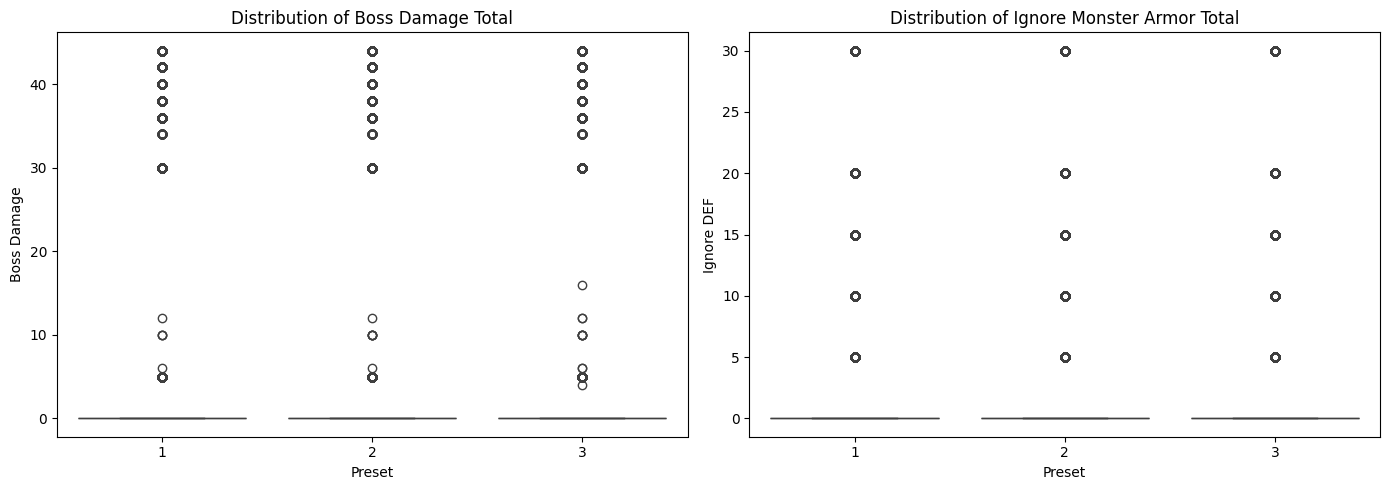

In [ ]:
# 필요한 컬럼 추출
boxplot_df = equipment_df[["preset", "boss_damage_total", "ignore_monster_armor_total"]]

# === 시각화 ===
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# boss_damage_total boxplot
sns.boxplot(data=boxplot_df, x="preset", y="boss_damage_total", ax=axes[0])
axes[0].set_title("Distribution of Boss Damage Total")
axes[0].set_xlabel("Preset")
axes[0].set_ylabel("Boss Damage")

# ignore_monster_armor_total boxplot
sns.boxplot(data=boxplot_df, x="preset", y="ignore_monster_armor_total", ax=axes[1])
axes[1].set_title("Distribution of Ignore Monster Armor Total")
axes[1].set_xlabel("Preset")
axes[1].set_ylabel("Ignore DEF")

plt.tight_layout()
plt.show()

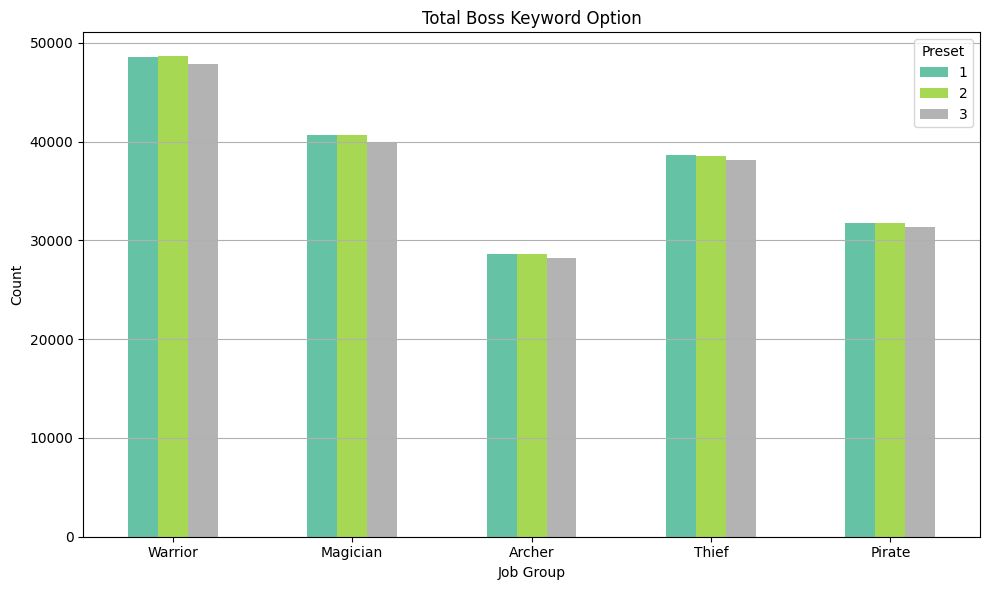

In [ ]:
import unicodedata

# 직업군 Unicode 정규화 + 영어 매핑
equipment_df["job_group"] = equipment_df["job_group"].apply(lambda x: unicodedata.normalize("NFC", x))
group_map = {
    "전사": "Warrior",
    "마법사": "Magician",
    "궁수": "Archer",
    "도적": "Thief",
    "해적": "Pirate"
}
equipment_df["job_group_en"] = equipment_df["job_group"].map(group_map)

# (텍스트형) 보스셋 키워드 수 비교
text_cols = [
    "potential_option_1", "potential_option_2", "potential_option_3",
    "additional_potential_option_1", "additional_potential_option_2", "additional_potential_option_3"
]
# 키워드 포함 여부 함수
def contains_boss_keyword(val):
    if pd.isna(val):
        return 0
    val = str(val)
    return int("보스" in val or "방어율 무시" in val)

equipment_df["boss_keyword_text_count"] = (
    equipment_df[text_cols]
    .stack()
    .map(contains_boss_keyword)
    .groupby(level=0)
    .sum()
)

# 직업군 + 프리셋 계산
group_preset_text_count = (
    equipment_df.groupby(["job_group_en", "preset"])["boss_keyword_text_count"]
    .sum()
    .reset_index()
)

# 피벗: 직업군 x 프리셋
pivot = group_preset_text_count.pivot(index="job_group_en", columns="preset", values="boss_keyword_text_count").fillna(0)
pivot = pivot.sort_index()

desired_order = [group_map[k] for k in group_map.keys()]  # ['Warrior', 'Magician', 'Archer', 'Thief', 'Pirate']
pivot = pivot.reindex(desired_order)

# === 시각화 ===
pivot.plot(kind="bar", figsize=(10, 6), colormap="Set2")
plt.title("Total Boss Keyword Option")
plt.xlabel("Job Group")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Preset")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [ ]:
# hyper_stat 데이터 모두 불러오기
# "equipment"(item), "hyper_stat", "ability","union_data"(union), "linkskill"

# 상위 폴더 경로
root_dir = "/content/drive/MyDrive/data/hyper_stat" # 수정

# 하위 모든 CSV 탐색
all_csv_files = glob.glob(os.path.join(root_dir, "*/*.csv"))

df_list = []
for file in all_csv_files:
    df = pd.read_csv(file)
    folder_name = os.path.basename(os.path.dirname(file))
    job_file = os.path.basename(file).replace("_hyper_stat.csv", "") # 수정
    df["job_group"] = folder_name
    df_list.append(df)

# 전체 통합
hyper_stat_df = pd.concat(df_list, ignore_index=True) # 수정

In [ ]:
# 저장할 디렉토리와 파일 경로
output_dir = "/content/drive/MyDrive/data/output"
output_path = os.path.join(output_dir, "hyper_stat_df.csv")

# 디렉토리 없으면 생성
os.makedirs(output_dir, exist_ok=True)

# CSV 저장
hyper_stat_df.to_csv(output_path, index=False, encoding='utf-8-sig')

In [ ]:
hyper_stat_df

,nickname,world,level,job,subclass,preset_number,stat_type,stat_point,stat_level,stat_increase,job_group
0,카인님,크로아,296,카인,카인,1,STR,3.0,2,힘 60 증가,궁수
1,카인님,크로아,296,카인,카인,1,DEX,60.0,7,민첩성 210 증가,궁수
2,카인님,크로아,296,카인,카인,1,INT,NaN,0,NaN,궁수
3,카인님,크로아,296,카인,카인,1,LUK,NaN,0,NaN,궁수
4,카인님,크로아,296,카인,카인,1,HP,NaN,0,NaN,궁수
...,...,...,...,...,...,...,...,...,...,...,...
2343878,퀘수꽝,이노시스,286,해적,바이퍼,3,상태 이상 내성,NaN,0,NaN,해적
2343879,퀘수꽝,이노시스,286,해적,바이퍼,3,공격력/마력,NaN,0,NaN,해적
2343880,퀘수꽝,이노시스,286,해적,바이퍼,3,획득 경험치,NaN,0,NaN,해적
2343881,퀘수꽝,이노시스,286,해적,바이퍼,3,아케인포스,NaN,0,NaN,해적


In [ ]:
# 결측치가 아닌 행만 필터링
valid_rows = hyper_stat_df[hyper_stat_df["stat_point"].notna()]

# preset_number 개수 계산
preset_counts = valid_rows["preset_number"].value_counts().sort_index()

# preset_number 비율 계산
preset_ratios = valid_rows["preset_number"].value_counts(normalize=True).sort_index() * 100

# 결합
preset_summary = pd.DataFrame({
    "count": preset_counts,
    "ratio_percent": preset_ratios.round(2)
})

preset_summary

,count,ratio_percent
preset_number,,
1,336980,36.76
2,320560,34.97
3,259179,28.27


보스 키워드 하이퍼스탯:
    preset_number  total_stat_point  avg_stat_level
0              1        19809085.0        8.482946
1              2        13490798.0        5.828492
2              3        15162295.0        6.521373


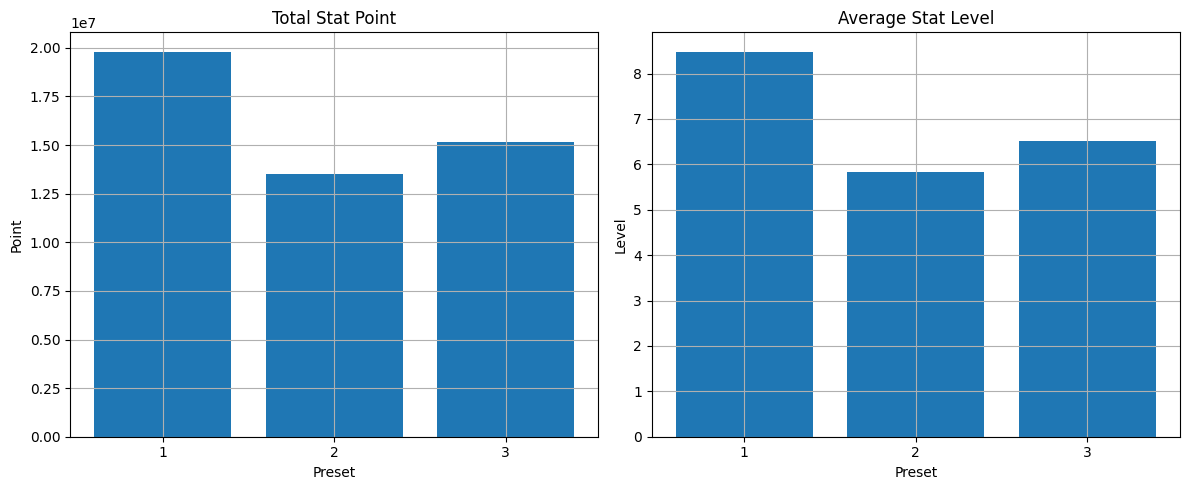

In [ ]:
# "보스" 또는 "방어율 무시"가 포함된 행 필터링
boss_keywords = "보스|방어율 무시"
df_boss_hyper = hyper_stat_df[
    hyper_stat_df["stat_type"].str.contains(boss_keywords, na=False)
]

# 프리셋별 stat_point 총합 계산
preset_point_sum = df_boss_hyper.groupby("preset_number")["stat_point"].sum().reset_index()
preset_point_sum.rename(columns={"stat_point": "total_stat_point"}, inplace=True)

# 프리셋별 stat_level 평균 계산
preset_level_avg = df_boss_hyper.groupby("preset_number")["stat_level"].mean().reset_index()
preset_level_avg.rename(columns={"stat_level": "avg_stat_level"}, inplace=True)

# 결과 병합 및 출력
summary = pd.merge(preset_point_sum, preset_level_avg, on="preset_number")
print("보스 키워드 하이퍼스탯:\n", summary)

# === 시각화 ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 총합 포인트 barplot
axes[0].bar(summary["preset_number"].astype(str), summary["total_stat_point"])
axes[0].set_title("Total Stat Point")
axes[0].set_xlabel("Preset")
axes[0].set_ylabel("Point")
axes[0].grid(True)

# 평균 레벨 barplot
axes[1].bar(summary["preset_number"].astype(str), summary["avg_stat_level"])
axes[1].set_title("Average Stat Level")
axes[1].set_xlabel("Preset")
axes[1].set_ylabel("Level")
axes[1].grid(True)

plt.tight_layout()
plt.show()

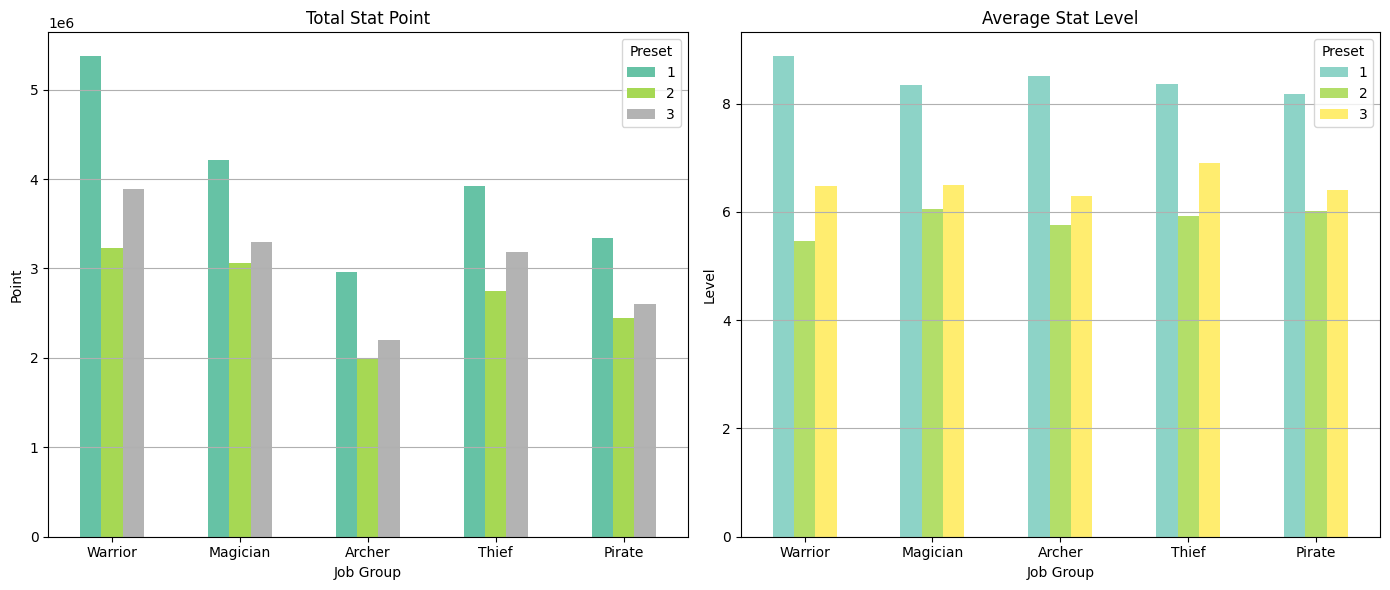

In [ ]:
# 직업군 Unicode 정규화 + 영어 매핑
hyper_stat_df["job_group"] = hyper_stat_df["job_group"].apply(lambda x: unicodedata.normalize("NFC", x))
group_map = {
    "전사": "Warrior",
    "마법사": "Magician",
    "궁수": "Archer",
    "도적": "Thief",
    "해적": "Pirate"
}
hyper_stat_df["job_group_en"] = hyper_stat_df["job_group"].map(group_map)

# '보스' 또는 '방어율 무시' 포함된 행 필터링
boss_keywords = "보스|방어율 무시"
df_boss_hyper = hyper_stat_df[
    hyper_stat_df["stat_type"].str.contains(boss_keywords, na=False)
]

# 직업군 + 프리셋 stat_point 총합 계산
preset_point_sum = (
    df_boss_hyper.groupby(["job_group_en", "preset_number"])["stat_point"]
    .sum()
    .reset_index()
    .rename(columns={"stat_point": "total_stat_point"})
)

# 직업군 + 프리셋 stat_level 평균 계산
preset_level_avg = (
    df_boss_hyper.groupby(["job_group_en", "preset_number"])["stat_level"]
    .mean()
    .reset_index()
    .rename(columns={"stat_level": "avg_stat_level"})
)

summary = pd.merge(preset_point_sum, preset_level_avg, on=["job_group_en", "preset_number"])

# 피벗: 직업군 x 프리셋
pivot_point = summary.pivot(index="job_group_en", columns="preset_number", values="total_stat_point").reindex([group_map[k] for k in group_map])
pivot_level = summary.pivot(index="job_group_en", columns="preset_number", values="avg_stat_level").reindex([group_map[k] for k in group_map])

# === 시각화 ===
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# stat_point 총합 시각화
pivot_point.plot(kind="bar", ax=axes[0], colormap="Set2")
axes[0].set_title("Total Stat Point")
axes[0].set_xlabel("Job Group")
axes[0].set_ylabel("Point")
axes[0].set_xticklabels(pivot_point.index, rotation=0)
axes[0].legend(title="Preset")
axes[0].grid(True, axis='y')

# stat_level 평균 시각화
pivot_level.plot(kind="bar", ax=axes[1], colormap="Set3")
axes[1].set_title("Average Stat Level")
axes[1].set_xlabel("Job Group")
axes[1].set_ylabel("Level")
axes[1].set_xticklabels(pivot_level.index, rotation=0)
axes[1].legend(title="Preset")
axes[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

In [ ]:
# ability 데이터 모두 불러오기
# "equipment"(item), "hyper_stat", "ability","union_data"(union), "linkskill"

# 상위 폴더 경로
root_dir = "/content/drive/MyDrive/data/ability" # 수정

# 하위 모든 CSV 탐색
all_csv_files = glob.glob(os.path.join(root_dir, "*/*.csv"))

df_list = []
for file in all_csv_files:
    df = pd.read_csv(file)
    folder_name = os.path.basename(os.path.dirname(file))
    job_file = os.path.basename(file).replace("_ability.csv", "") # 수정
    df["job_group"] = folder_name
    df_list.append(df)

# 전체 통합
ability_df = pd.concat(df_list, ignore_index=True) # 수정

In [ ]:
ability_df

,nickname,world,level,job,subclass,preset_number,preset_grade,ability_no,ability_grade,ability_value,job_group
0,문제인,루나,295,칼리,칼리,1,레전드리,1,레전드리,스킬 사용 시 20% 확률로 재사용 대기시간이 미적용,도적
1,문제인,루나,295,칼리,칼리,1,레전드리,2,유니크,보스 몬스터 공격 시 데미지 10% 증가,도적
2,문제인,루나,295,칼리,칼리,1,레전드리,3,유니크,상태 이상에 걸린 대상 공격 시 데미지 8% 증가,도적
3,문제인,루나,295,칼리,칼리,2,레전드리,1,레전드리,아이템 드롭률 20% 증가,도적
4,문제인,루나,295,칼리,칼리,2,레전드리,3,유니크,메소 획득량 15% 증가,도적
...,...,...,...,...,...,...,...,...,...,...,...
413518,땅원영,챌린저스2,282,카이저,카이저,2,레전드리,2,에픽,아이템 드롭률 9% 증가,전사
413519,땅원영,챌린저스2,282,카이저,카이저,2,레전드리,3,에픽,"STR 15 증가, INT 8 증가",전사
413520,땅원영,챌린저스2,282,카이저,카이저,3,레전드리,1,레전드리,아이템 드롭률 20% 증가,전사
413521,땅원영,챌린저스2,282,카이저,카이저,3,레전드리,2,유니크,메소 획득량 15% 증가,전사


In [ ]:
# preset_number 개수 계산
preset_counts = ability_df["preset_number"].value_counts().sort_index()

# preset_number 비율(%) 계산
preset_ratios = ability_df["preset_number"].value_counts(normalize=True).sort_index() * 100

# DataFrame 결합
preset_summary = pd.DataFrame({
    "count": preset_counts,
    "ratio_percent": preset_ratios.round(2)
})

preset_summary

,count,ratio_percent
preset_number,,
1,137841,33.33
2,137841,33.33
3,137841,33.33


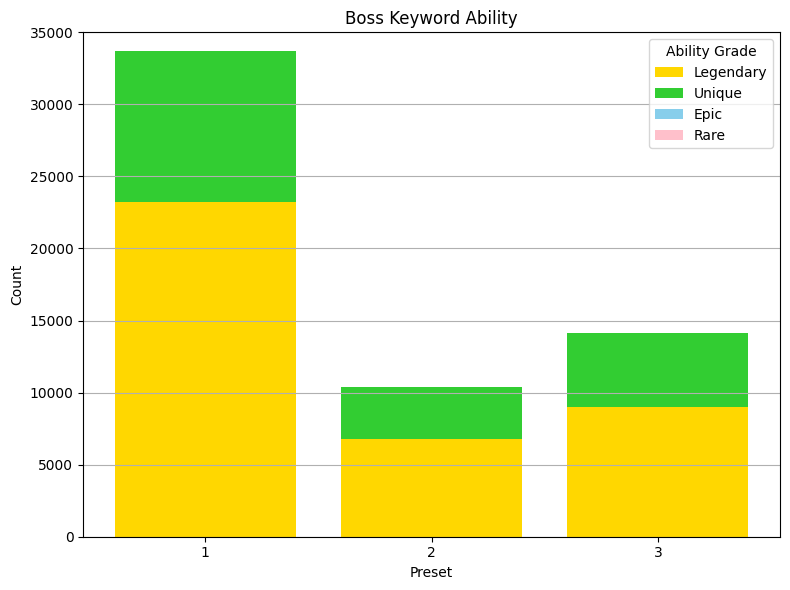

In [ ]:
# '보스' 키워드가 포함된 행 필터링
df_boss_ability = ability_df[
    ability_df["ability_value"].str.contains("보스", na=False)
]

# 한글 → 영어 매핑 딕셔너리
grade_label_map = {
    "레전드리": "Legendary",
    "유니크": "Unique",
    "에픽": "Epic",
    "레어": "Rare"
}

# 프리셋별 ability_grade 계산
grade_order = ["레전드리", "유니크", "에픽", "레어"]
preset_grade_counts = (
    df_boss_ability.groupby(["preset_number", "ability_grade"])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=grade_order, fill_value=0)
)

preset_grade_counts_english = preset_grade_counts.rename(columns=grade_label_map)

# === 시각화 ===
fig, ax = plt.subplots(figsize=(8, 6))
colors = ["gold", "limegreen", "skyblue", "pink"]

bottom = pd.Series([0] * len(preset_grade_counts_english), index=preset_grade_counts_english.index)
for i, grade in enumerate(preset_grade_counts_english.columns):
    ax.bar(
        preset_grade_counts_english.index.astype(str),
        preset_grade_counts_english[grade],
        bottom=bottom,
        label=grade,
        color=colors[i]
    )
    bottom += preset_grade_counts_english[grade]

ax.set_title("Boss Keyword Ability")
ax.set_xlabel("Preset")
ax.set_ylabel("Count")
ax.set_ylim(0, 35000)
ax.legend(title="Ability Grade")
ax.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# linkskill 데이터 모두 불러오기
# "equipment"(item), "hyper_stat", "ability","union_data"(union), "linkskill"

# 상위 폴더 경로
root_dir = "/content/drive/MyDrive/data/linkskill" # 수정

# 하위 모든 CSV 탐색
all_csv_files = glob.glob(os.path.join(root_dir, "*/*.csv"))

df_list = []
for file in all_csv_files:
    df = pd.read_csv(file)
    folder_name = os.path.basename(os.path.dirname(file))
    job_file = os.path.basename(file).replace("_linkskill.csv", "") # 수정
    df["job_group"] = folder_name
    df_list.append(df)

# 전체 통합
linkskill_df = pd.concat(df_list, ignore_index=True) # 수정

In [ ]:
# 저장할 디렉토리와 파일 경로
output_dir = "/content/drive/MyDrive/output"
output_path = os.path.join(output_dir, "linkskill_df.csv")

# CSV 저장
linkskill_df.to_csv(output_path, index=False, encoding='utf-8-sig')

In [ ]:
linkskill_df

,nickname,world,level,job,subclass,preset_number,skill_name,skill_level,skill_effect,job_group
0,플위,크로아,295,기사단,플레임위자드,1,데들리 인스팅트,2,크리티컬 확률 15% 증가,마법사
1,플위,크로아,295,기사단,플레임위자드,1,데몬스 퓨리,2,보스 몬스터 공격 시 데미지 15% 증가,마법사
2,플위,크로아,295,기사단,플레임위자드,1,무아,2,"전투 상태가 5초 지속되면 발동되며 최대 5회 중첩가능, 지속시간 5초\n발동 시 ...",마법사
3,플위,크로아,295,기사단,플레임위자드,1,와일드 레이지,2,데미지 10% 증가,마법사
4,플위,크로아,295,기사단,플레임위자드,1,전투의 흐름,2,"일정 거리 이동 시 발동되며 최대 4회 중첩가능, 지속시간 10초\n각 중첩당 데미...",마법사
...,...,...,...,...,...,...,...,...,...,...
1468078,헤디,루나,281,해적,캡틴,3,인텐시브 인썰트,2,"캐릭터보다 레벨이 낮은 몬스터 공격 시 데미지 6% 증가, 상태 이상에 걸린 몬스터...",해적
1468079,헤디,루나,281,해적,캡틴,3,임피리컬 널리지,4,"공격한 적 중 최대 HP가 가장 높은 적에 대한 약점을 21% 확률로 파악, 파악한...",해적
1468080,헤디,루나,281,해적,캡틴,3,자연의 벗,2,"데미지 5% 증가\n일반 몬스터 20명 처치 시 자연의 도움 발동, 자연의 도움 발...",해적
1468081,헤디,루나,281,해적,캡틴,3,판단,2,크리티컬 데미지 4% 증가,해적


In [ ]:
# preset_number 개수 계산
preset_counts = linkskill_df["preset_number"].value_counts().sort_index()

# preset_number 비율(%) 계산
preset_ratios = linkskill_df["preset_number"].value_counts(normalize=True).sort_index() * 100

# DataFrame 결합
preset_summary = pd.DataFrame({
    "count": preset_counts,
    "ratio_percent": preset_ratios.round(2)
})

print(preset_summary)

                count  ratio_percent
preset_number                       
1              542059          36.92
2              532403          36.27
3              393621          26.81


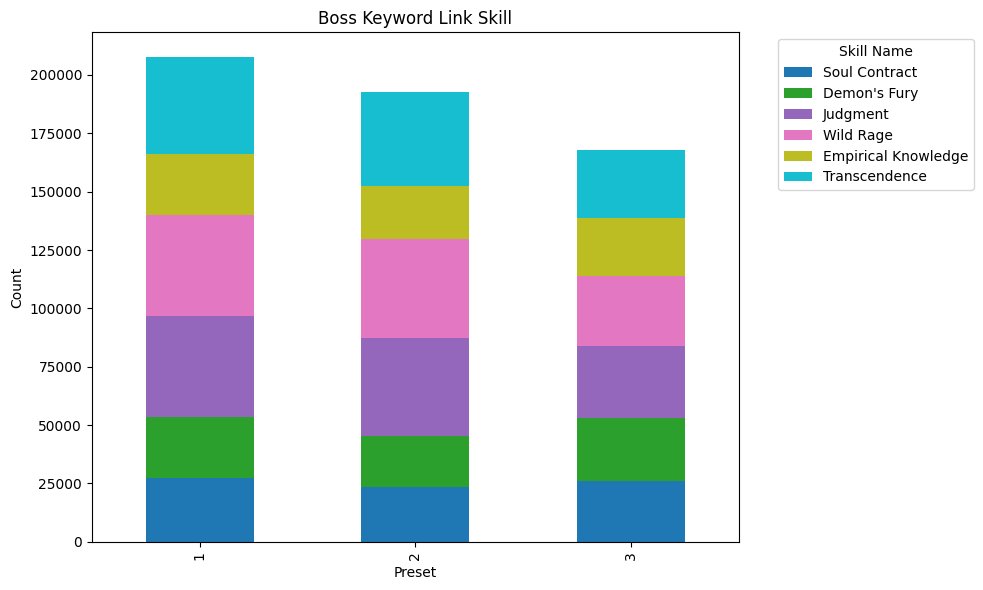

In [ ]:
# 보스 공략 링크스킬 0순위
# 엔젤릭버스터(소울 컨트랙트), 데몬슬레이어(데몬스 퓨리), 키네시스(판단), 데몬어벤져(와일드 레이지), 모험가 마법사(임피리컬 널리지), 아크(무아)
target_skills = [
    "소울 컨트랙트", "데몬스 퓨리", "판단", "와일드 레이지", "임피리컬 널리지", "무아"
]

skill_name_map = {
    "소울 컨트랙트": "Soul Contract",
    "데몬스 퓨리": "Demon's Fury",
    "판단": "Judgment",
    "와일드 레이지": "Wild Rage",
    "임피리컬 널리지": "Empirical Knowledge",
    "무아": "Transcendence"
}

target_skills = list(skill_name_map.keys())

# 타겟 스킬 필터링
df_target_skills = linkskill_df[linkskill_df["skill_name"].isin(target_skills)]

# 프리셋별 + 스킬별 계산
preset_skill_counts = (
    df_target_skills.groupby(["preset_number", "skill_name"])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=target_skills, fill_value=0)
)

preset_skill_counts_english = preset_skill_counts.rename(columns=skill_name_map)

# === 시각화 ===
preset_skill_counts_english.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="tab10")
plt.title("Boss Keyword Link Skill")
plt.xlabel("Preset")
plt.ylabel("Count")
plt.legend(title="Skill Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

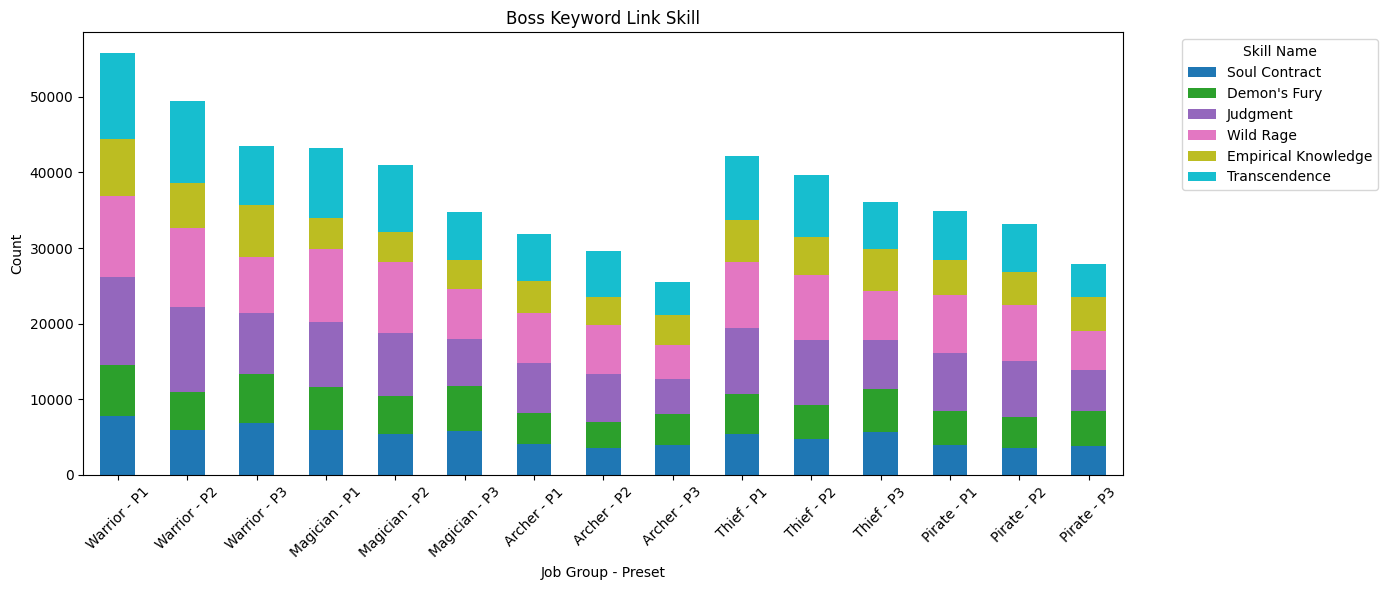

In [ ]:
# 직업군 Unicode 정규화 + 영어 매핑
linkskill_df["job_group"] = linkskill_df["job_group"].apply(lambda x: unicodedata.normalize("NFC", x))
group_map = {
    "전사": "Warrior", "마법사": "Magician", "궁수": "Archer",
    "도적": "Thief", "해적": "Pirate"
}
linkskill_df["job_group_en"] = linkskill_df["job_group"].map(group_map)

# 스킬 목록 및 영어 매핑
target_skills = ["소울 컨트랙트", "데몬스 퓨리", "판단", "와일드 레이지", "임피리컬 널리지", "무아"]
skill_name_map = {
    "소울 컨트랙트": "Soul Contract",
    "데몬스 퓨리": "Demon's Fury",
    "판단": "Judgment",
    "와일드 레이지": "Wild Rage",
    "임피리컬 널리지": "Empirical Knowledge",
    "무아": "Transcendence"
}

# 타겟 스킬 필터링
df_target_skills = linkskill_df[linkskill_df["skill_name"].isin(target_skills)]

# job_group + preset + skill_name 그룹핑
grouped = (
    df_target_skills.groupby(["job_group_en", "preset_number", "skill_name"])
    .size()
    .reset_index(name="count")
)

grouped["skill_name_en"] = grouped["skill_name"].map(skill_name_map)

# 피벗: index = job_group + preset, columns = skill_name_en
pivot = grouped.pivot_table(
    index=["job_group_en", "preset_number"],
    columns="skill_name_en",
    values="count",
    fill_value=0
).reset_index()

# === 시각화 ===
pivot["x_label"] = pivot["job_group_en"] + " - P" + pivot["preset_number"].astype(str)

# 순서 정렬
desired_order = []
for group in group_map.values():
    for preset in [1, 2, 3]:
        desired_order.append(f"{group} - P{preset}")

pivot["x_label"] = pd.Categorical(pivot["x_label"], categories=desired_order, ordered=True)
pivot = pivot.sort_values("x_label")

pivot.set_index("x_label")[skill_name_map.values()].plot(
    kind="bar", stacked=True, figsize=(14, 6), colormap="tab10"
)
plt.title("Boss Keyword Link Skill")
plt.xlabel("Job Group - Preset")
plt.ylabel("Count")
plt.legend(title="Skill Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# union/union_data 데이터 모두 불러오기
# "equipment"(item), "hyper_stat", "ability","union_data"(union), "linkskill"

# 상위 폴더 경로
root_dir = "/content/drive/MyDrive/data/union" # 수정

# 하위 모든 CSV 탐색
all_csv_files = glob.glob(os.path.join(root_dir, "*/*.csv"))

df_list = []
for file in all_csv_files:
    df = pd.read_csv(file)
    folder_name = os.path.basename(os.path.dirname(file))
    job_file = os.path.basename(file).replace("_union_data.csv", "") # 수정
    df["job_group"] = folder_name
    df_list.append(df)

# 전체 통합
union_df = pd.concat(df_list, ignore_index=True) # 수정

In [ ]:
union_df

,nickname,world,level,job,subclass,union_level,union_grade,union_artifact_level,union_rader_preset1_stat,union_rader_preset1_occupied,...,crystal_8_opt2,crystal_8_opt3,champion_preset_1_badges,champion_preset_2_badges,champion_preset_3_badges,artifact_effect_파이널 어택류 스킬의 데미지 증가,artifact_effect_상태 이상 내성 증가,artifact_effect_소환수 지속시간 증가,artifact_effect_최대 HP 최대 MP 증가,job_group
0,캡스,크로아,295,기사단,미하일,9493.0,그랜드 마스터 유니온 3,55.0,"상태 이상 내성 4 증가, INT 80 증가, STR 80 증가, 공격력/마력 20...","최대 HP 250 증가, STR 50 증가, 크리티컬 데미지 20.00% 증가, D...",...,버프 지속시간 증가,크리티컬 확률 증가,"올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...",NaN,NaN,NaN,NaN,NaN,NaN,전사
1,쥬히,엘리시움,294,기사단,미하일,10727.0,슈프림 유니온 1,56.0,"INT 100 증가, INT 100 증가, 공격력/마력 25 증가, 방어율 무시 6...","마력 1 증가, STR 75 증가, 크리티컬 데미지 20.00% 증가, DEX 5 ...",...,버프 지속시간 증가,크리티컬 확률 증가,"올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...","올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...","올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가",NaN,NaN,NaN,NaN,전사
2,부도,스카니아,294,기사단,미하일,9813.0,그랜드 마스터 유니온 4,56.0,"STR 80 증가, 공격력/마력 20 증가, 최대 HP 2500 증가, STR 10...","DEX 5 증가, STR 75 증가, 크리티컬 데미지 20.00% 증가, 획득 경험...",...,메소 획득량 증가,공격력/마력 증가,"올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...","올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...","올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가",10.0,NaN,NaN,NaN,전사
3,일선에서,스카니아,293,기사단,미하일,9670.0,그랜드 마스터 유니온 4,53.0,"크리티컬 확률 5% 증가, 공격 시 20%의 확률로 데미지 20% 증가, 최대 HP...","버프 지속시간 40% 증가, 최대 HP 250 증가, STR 25 증가, 크리티컬 ...",...,공격력/마력 증가,버프 지속시간 증가,"올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...","올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가","올스탯 20, 최대 HP/MP 1000 증가",NaN,NaN,NaN,NaN,전사
4,와락,베라,293,기사단,미하일,9505.0,그랜드 마스터 유니온 4,55.0,"LUK 80 증가, INT 80 증가, STR 100 증가, 경험치 획득량 12% ...","STR 75 증가, 크리티컬 데미지 20.00% 증가, DEX 5 증가, 공격력 1...",...,버프 지속시간 증가,메소 획득량 증가,"올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...","올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...","올스탯 20, 최대 HP/MP 1000 증가",NaN,NaN,NaN,NaN,전사
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45983,김깜몬,베라,282,루미너스,루미너스,8797.0,그랜드 마스터 유니온 1,46.0,"DEX 80 증가, INT 100 증가, 최대 HP 2000 증가, DEX 80 증...","크리티컬 데미지 20.00% 증가, STR 5 증가, DEX 5 증가, 크리티컬 확...",...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,마법사
45984,트리트민,루나,282,루미너스,루미너스,8799.0,그랜드 마스터 유니온 1,45.0,"경험치 획득량 10% 증가, DEX 80 증가, 메소 획득량 4% 증가, INT 8...","버프 지속시간 15% 증가, 최대 HP 250 증가, 크리티컬 데미지 20.00% ...",...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,마법사
45985,노른판타지,엘리시움,282,루미너스,루미너스,8917.0,그랜드 마스터 유니온 2,49.0,"스킬 재사용 대기시간 5% 감소, INT 100 증가, 메소 획득량 4% 증가, 경...","크리티컬 데미지 20.00% 증가, 마력 5 증가, 크리티컬 확률 7% 증가, 버프...",...,NaN,NaN,"올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가",NaN,NaN,NaN,NaN,NaN,5.0,마법사
45986,쑤쟐,루나,282,루미너스,루미너스,9905.0,그랜드 마스터 유니온 4,50.0,"STR 100 증가, 버프 지속시간 20% 증가, 최대 MP 6% 증가, STR 8...","상태 이상 내성 1 증가, DEX 5 증가, 크리티컬 데미지 20.00% 증가, 획...",...,크리티컬 확률 증가,메소 획득량 증가,"올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가","올스탯 20, 최대 HP/MP 1000 증가",NaN,NaN,NaN,NaN,NaN,마법사


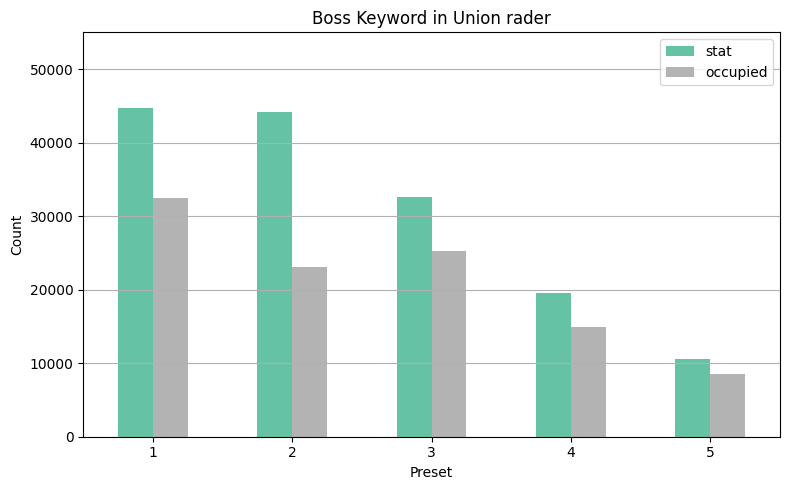

In [ ]:
# 분석 대상 컬럼
stat_cols = [
    "union_rader_preset1_stat",
    "union_rader_preset2_stat",
    "union_rader_preset3_stat",
    "union_rader_preset4_stat",
    "union_rader_preset5_stat"
]

occupied_cols = [
    "union_rader_preset1_occupied",
    "union_rader_preset2_occupied",
    "union_rader_preset3_occupied",
    "union_rader_preset4_occupied",
    "union_rader_preset5_occupied"
]

# '보스' 키워드 포함 여부를 프리셋별로 확인
boss_counts = {}

for col in stat_cols + occupied_cols:
    boss_counts[col] = union_df[col].astype(str).str.contains("보스", na=False).sum()

# 프리셋 그룹핑
result = pd.DataFrame({
    "preset_number": [1, 2, 3, 4, 5],
    "stat": [
        boss_counts["union_rader_preset1_stat"],
        boss_counts["union_rader_preset2_stat"],
        boss_counts["union_rader_preset3_stat"],
        boss_counts["union_rader_preset4_stat"],
        boss_counts["union_rader_preset5_stat"]
    ],
    "occupied": [
        boss_counts["union_rader_preset1_occupied"],
        boss_counts["union_rader_preset2_occupied"],
        boss_counts["union_rader_preset3_occupied"],
        boss_counts["union_rader_preset4_occupied"],
        boss_counts["union_rader_preset5_occupied"],
    ]
})

# === 시각화 ===
ax = result.set_index("preset_number").plot(
    kind="bar",
    stacked=False,
    figsize=(8, 5),
    colormap="Set2"
)

plt.title("Boss Keyword in Union rader")
plt.xlabel("Preset")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.ylim(0,55000)
plt.grid(axis='y')
plt.tight_layout()

# 수치 표시 추가
#for container in ax.containers:
    #ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)

plt.show()

### 2. 장비-스탯 관련(전체)

#### 기준 변경 전 데이터

In [ ]:
# set_effect 데이터 모두 불러오기

# 상위 폴더 경로
root_dir = "/content/drive/MyDrive/data/set_effect" # 수정

# 하위 모든 CSV 탐색
all_csv_files = glob.glob(os.path.join(root_dir, "*/*.csv"))

df_list = []
for file in all_csv_files:
    df = pd.read_csv(file)
    folder_name = os.path.basename(os.path.dirname(file))
    job_file = os.path.basename(file).replace("_set_effect.csv", "") # 수정
    df["job_group"] = folder_name
    df_list.append(df)

# 전체 통합
set_effect_df = pd.concat(df_list, ignore_index=True) # 수정

In [ ]:
# 저장할 디렉토리와 파일 경로
output_dir = "/content/drive/MyDrive/output"
output_path = os.path.join(output_dir, "set_effect_df.csv")

# CSV 저장
set_effect_df.to_csv(output_path, index=False, encoding='utf-8-sig')

In [ ]:
set_effect_df

,nickname,world,level,job,subclass,set_name,total_set_count,set_option,job_group
0,캡스,크로아,295,기사단,미하일,루타비스 세트(전사),4,"STR : +20, DEX : +20, 최대 HP : +1000, 최대 MP : +...",전사
1,캡스,크로아,295,기사단,미하일,보스 장신구 세트,3,"올스탯 : +10, 최대 HP : +5%, 최대 MP : +5%, 공격력 : +5,...",전사
2,캡스,크로아,295,기사단,미하일,칠흑의 보스 세트,3,"올스탯 : +10, 최대 HP : +250, 공격력 : +10, 마력 : +10, ...",전사
3,캡스,크로아,295,기사단,미하일,모라스 세트,5,"올스탯 : +5, 최대 HP : +250, 최대 MP : +250, 공격력 : +3...",전사
4,캡스,크로아,295,기사단,미하일,아케인셰이드 세트(전사),5,"공격력 : +30, 마력 : +30, 보스 몬스터 공격 시 데미지 : +10%\n공...",전사
...,...,...,...,...,...,...,...,...,...
250809,PreludeBflat,스카니아,282,루미너스,루미너스,루타비스 세트(마법사),2,"INT : +20, LUK : +20, 최대 HP : +1000, 최대 MP : +...",마법사
250810,PreludeBflat,스카니아,282,루미너스,루미너스,쁘띠 초롱나비 세트,1,<나비 정원의 빛 Lv.1> 스킬 사용 가능,마법사
250811,PreludeBflat,스카니아,282,루미너스,루미너스,여명의 보스 세트,4,"올스탯 : +10, 최대 HP : +250, 공격력 : +10, 마력 : +10, ...",마법사
250812,PreludeBflat,스카니아,282,루미너스,루미너스,별하늘 난초 세트,5,"올스탯 : +5, 최대 HP : +250, 최대 MP : +250, 공격력 : +3...",마법사


In [ ]:
# 1. 평균 스타포스
avg_starforce_all = equipment_df.groupby("nickname")["starforce"].mean().reset_index()
avg_starforce_all.rename(columns={"starforce": "avg_starforce"}, inplace=True)

# 2. 기본 캐릭터 정보
basic_info_all = equipment_df.groupby("nickname").first().reset_index()[
    ["nickname", "world", "level", "job", "subclass"]
]

# 3. 세트 점수 계산
set_weight = {
    "여명": 2,
    "칠흑": 3,
    "루타비스": 2,
    "아케인": 3,
    "에테르넬": 4
}

def classify_weighted_set(name):
    if pd.isna(name):
        return "기타"
    for keyword in set_weight:
        if keyword in name:
            return keyword
    return "기타"

set_effect_df["set_category"] = set_effect_df["set_name"].apply(classify_weighted_set)

# 기타 세트 1점 부여
full_weight = set_weight.copy()
full_weight["기타"] = 1

set_effect_df["score_per_set"] = set_effect_df["set_category"].map(full_weight)
set_effect_df["set_score"] = set_effect_df["score_per_set"] * set_effect_df["total_set_count"]

set_score_all = set_effect_df.groupby("nickname")["set_score"].sum().reset_index()
set_score_all["set_score"] = set_score_all["set_score"].fillna(0).astype(int)

# 4. 프리셋 1번 하이퍼스탯만 사용
filtered_hyper = hyper_stat_df[
    (hyper_stat_df["preset_number"] == 1) & (~hyper_stat_df["stat_point"].isna())
]

stat_point_std = filtered_hyper.groupby("nickname")["stat_point"].std().reset_index(name="stat_point_std")
stat_type_count = filtered_hyper.groupby("nickname")["stat_type"].nunique().reset_index(name="stat_type_count")
hyper_stats_1 = pd.merge(stat_type_count, stat_point_std, on="nickname")

# 5. 통합
result_df_all = basic_info_all.merge(avg_starforce_all, on="nickname", how="left")
result_df_all = result_df_all.merge(set_score_all, on="nickname", how="left")
result_df_all = result_df_all.merge(hyper_stats_1, on="nickname", how="left")

# 6. set_score = 0 → 1 보정
result_df_all["set_score"] = result_df_all["set_score"].apply(lambda x: 1 if x == 0 else x)

# 7. investment_index 계산
result_df_all["investment_index"] = result_df_all["set_score"] * result_df_all["avg_starforce"]

# 8. 정수/소수점 포맷 처리
result_df_all["stat_type_count"] = result_df_all["stat_type_count"].fillna(0).astype(int)
result_df_all["stat_point_std"] = result_df_all["stat_point_std"].round(1)
result_df_all["avg_starforce"] = result_df_all["avg_starforce"].round(1)
result_df_all["investment_index"] = result_df_all["investment_index"].round(1)

# 9. 컬럼 재정렬: set_score 바로 옆에 investment_index
cols = list(result_df_all.columns)
if "set_score" in cols and "investment_index" in cols:
    set_idx = cols.index("set_score")
    cols.remove("investment_index")
    cols.insert(set_idx + 1, "investment_index")
    result_df_all = result_df_all[cols]

In [ ]:
result_df_all

,nickname,world,level,job,subclass,avg_starforce,set_score,investment_index,stat_type_count,stat_point_std
0,0005,크로아,288,궁수,패스파인더,2.2,23.0,51.8,9,157.7
1,002번출구,엘리시움,286,해적,캐논마스터,12.0,28.0,335.6,8,199.4
2,00우,크로아,288,초월자,제로,14.0,36.0,503.0,9,189.2
3,00우즈키00,이노시스,276,레지스탕스,와일드헌터,14.2,26.0,368.7,6,137.3
4,0101,크로아,277,레지스탕스,와일드헌터,5.9,29.0,169.9,6,111.1
...,...,...,...,...,...,...,...,...,...,...
45933,힝짜,스카니아,292,궁수,패스파인더,14.6,72.0,1051.0,8,185.1
45934,힝챨,루나,291,레지스탕스,데몬슬레이어,13.8,32.0,441.3,8,208.6
45935,힝푸,베라,287,호영,호영,11.8,32.0,378.7,7,168.8
45936,힝풋,오로라,286,레지스탕스,데몬어벤져,9.2,21.0,192.6,10,198.7


#### 기준 변경 후

In [ ]:
## 장비 수치화 기준 변경
# 세트에 해당되는 장비를 골라내서 점수 부여 => 장비 단위 점수 × 강화 수치

# 1. 기본 캐릭터 정보
basic_info_all = equipment_df.groupby("nickname").first().reset_index()[
    ["nickname", "world", "level", "job", "subclass"]
]

# 2. 장비 세트 기준 정의
set_keywords = {
    "루타비스": ["이글아이", "트릭스터", "하이네스", "파프니르"],
    "아케인": ["아케인"],
    "에테르넬": ["에테르넬", "제네시스", "데스티니"]
}
set_fullnames = {
    "칠흑": [
        "루즈 컨트롤 머신 마크", "마력이 깃든 안대", "블랙 하트", "컴플리트 언더컨트롤",
        "몽환의 벨트", "고통의 근원", "창세의 뱃지", "커맨더 포스 이어링",
        "거대한 공포", "저주받은 마도서", "미트라의 분노"
    ],
    "여명": [
        "트와일라이트 마크", "에스텔라 이어링", "데이브레이크 펜던트", "여명의 가디언 엔젤 링"
    ]
}
set_weight = {
    "여명": 2,
    "칠흑": 3,
    "루타비스": 2,
    "아케인": 3,
    "에테르넬": 4,
    "기타": 1
}

# 3. 세트 분류 함수
def classify_equipment_set(item_name):
    if pd.isna(item_name):
        return "기타"
    for set_name, keywords in set_keywords.items():
        if any(keyword in item_name for keyword in keywords):
            return set_name
    for set_name, fullnames in set_fullnames.items():
        if item_name in fullnames:
            return set_name
    return "기타"

# 4. 세트 분류 및 점수 계산
equipment_df["equipment_set"] = equipment_df["item_name"].apply(classify_equipment_set)
equipment_df["equipment_score"] = equipment_df["equipment_set"].map(set_weight).fillna(1)
equipment_df["equipment_score_weighted"] = equipment_df["starforce"] * equipment_df["equipment_score"]

# 5. 프리셋 1 장비만 계산
preset1_equipment = equipment_df[equipment_df["preset_number"] == 1]
user_equipment_score = preset1_equipment.groupby("nickname")["equipment_score_weighted"].sum().reset_index()
user_equipment_score.rename(columns={"equipment_score_weighted": "investment_index"}, inplace=True)

# 6. 하이퍼스탯 프리셋 1 기준
filtered_hyper = hyper_stat_df[
    (hyper_stat_df["preset_number"] == 1) & (~hyper_stat_df["stat_point"].isna())
]
stat_point_std = filtered_hyper.groupby("nickname")["stat_point"].std().reset_index(name="stat_point_std")
stat_type_count = filtered_hyper.groupby("nickname")["stat_type"].nunique().reset_index(name="stat_type_count")
hyper_stats_1 = pd.merge(stat_type_count, stat_point_std, on="nickname")

# 7. 최종 통합
result_df_all = basic_info_all.merge(user_equipment_score, on="nickname", how="left")
result_df_all = result_df_all.merge(hyper_stats_1, on="nickname", how="left")

# 8. 정수/소수점 처리
result_df_all["stat_type_count"] = result_df_all["stat_type_count"].fillna(0).astype(int)
result_df_all["stat_point_std"] = result_df_all["stat_point_std"].round(1)
result_df_all["investment_index"] = result_df_all["investment_index"].fillna(0).round(0).astype(int)

# 9. 컬럼 순서 정리
cols = list(result_df_all.columns)
if "subclass" in cols and "investment_index" in cols:
    subclass_idx = cols.index("subclass")
    cols.remove("investment_index")
    cols.insert(subclass_idx + 1, "investment_index")
    result_df_all = result_df_all[cols]

In [ ]:
result_df_all

,nickname,world,level,job,subclass,investment_index,stat_type_count,stat_point_std
0,0005,크로아,288,궁수,패스파인더,54,9,157.7
1,002번출구,엘리시움,286,해적,캐논마스터,496,8,199.4
2,00우,크로아,288,초월자,제로,882,9,189.2
3,00우즈키00,이노시스,276,레지스탕스,와일드헌터,451,6,137.3
4,0101,크로아,277,레지스탕스,와일드헌터,246,6,111.1
...,...,...,...,...,...,...,...,...
45933,힝짜,스카니아,292,궁수,패스파인더,1230,8,185.1
45934,힝챨,루나,291,레지스탕스,데몬슬레이어,859,8,208.6
45935,힝푸,베라,287,호영,호영,499,7,168.8
45936,힝풋,오로라,286,레지스탕스,데몬어벤져,305,10,198.7


In [ ]:
result_df_all["investment_index"].min(), result_df_all["investment_index"].max()

(0, 1499)

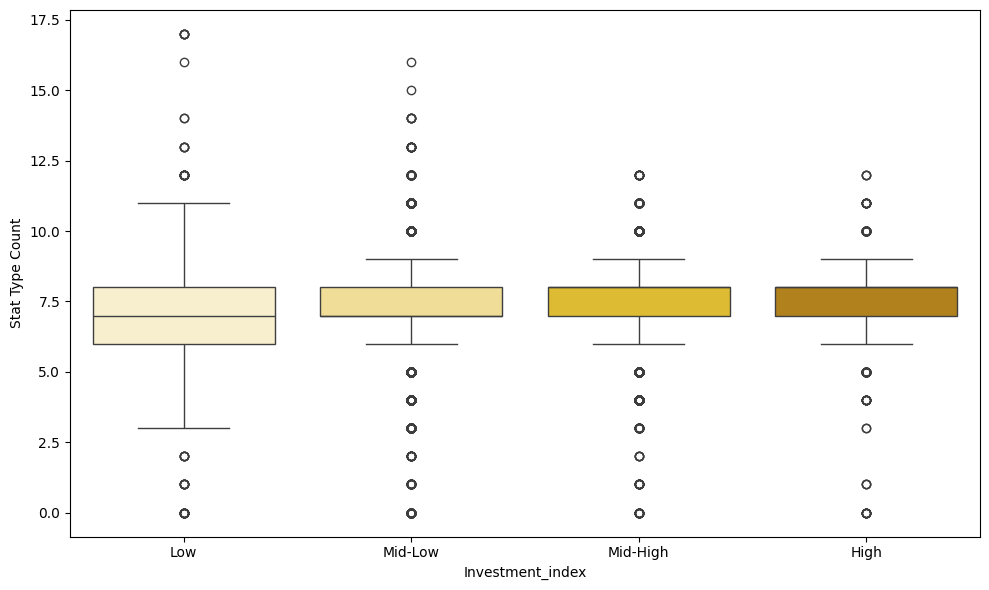

In [ ]:
# 1. 수치 기반 구간 정의
bins = [0, 375, 750, 1125, float("inf")]
labels = ["Low", "Mid-Low", "Mid-High", "High"]

# 2. 구간화
result_df_all["investment_group"] = pd.cut(
    result_df_all["investment_index"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# 팔레트 정의
yellow_palette = ["#FEF3C7", "#FDE68A", "#FACC15", "#CA8A04"]

# 3. 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=result_df_all,
    x="investment_group",
    y="stat_type_count",
    hue="investment_group",
    palette=yellow_palette,
    legend=False
)

plt.xlabel("Investment_index")
plt.ylabel("Stat Type Count")
plt.tight_layout()
plt.show()

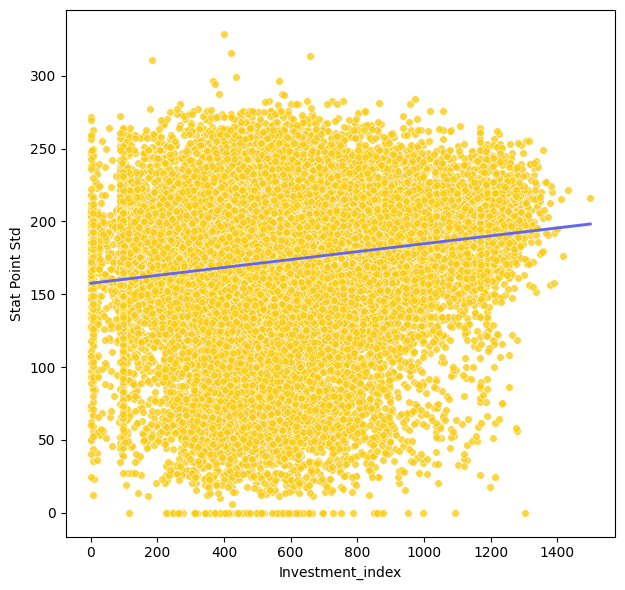

In [ ]:
plt.figure(figsize=(12, 6))

# 스타일 설정
scatter_kws = {
    "color": "#FACC15",
    "s": 30,
    "alpha": 0.8
}

# 산점도 - 투자 지표 vs 스탯 분산 평균
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=result_df_all,
    x="investment_index",
    y="stat_point_std",
    **scatter_kws
)

# 회귀선(추세선)
sns.regplot(
    data=result_df_all,
    x="investment_index",
    y="stat_point_std",
    scatter=False,
    color="#6366F1",
    line_kws={"linewidth": 2}
)

plt.xlabel("Investment_index")
plt.ylabel("Stat Point Std")

plt.tight_layout()
plt.show()

# **가설검정 결론**

### 1. 프리셋 관련(전체) - 추론통계

#### 장비 관련 결론

🔎 검정 결과 요약
- 카이제곱 독립성 검정 통계량: 55.8874
- p-value: 0.0000
- 자유도: 2
- Cramér's V: 0.0042

➡️ 프리셋 번호와 보스셋 여부 사이에 통계적으로 유의미한 차이는 존재하지만, <br>
➡️ 실질적인 상관관계는 매우 미약함 (Cramér's V ≈ 0)

<br>

📊 보스셋 기준별 분포
- boss_stat_score ≥ 1~5 비율: 20.36% (동일)
- boss_stat_score ≥ 10 비율: 11.40%
- boss_keyword_text_count ≥ 1 비율: 10.07%

<br>

📌 해석 및 결론 <br>
이러한 결과는 전체 유저 중 다수가 보스 관련 스탯이나 키워드에 큰 비중을 두지 않았다는 것을 시사한다.
- 보스셋 기준을 조정해도 전체 분포 구조가 거의 변하지 않았으며,
- 이는 곧 프리셋 번호에 따라 보스셋을 고정적으로 구성하는 유저는 소수라는 것을 보여준다.

즉, 보스셋 구성이 프리셋 번호에 따라 일정하게 분리되어 있다고 보기 어렵고,
프리셋의 역할이 뚜렷하게 나뉘어 있지는 않은 것으로 해석할 수 있다.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# 수치형 점수 계산: 보스 데미지 + 방무
equipment_df["boss_stat_score"] = (
    equipment_df["boss_damage_total"].fillna(0) +
    equipment_df["ignore_monster_armor_total"].fillna(0)
)

# 보스 키워드 텍스트 포함 수 계산
text_cols = [
    "potential_option_1", "potential_option_2", "potential_option_3",
    "additional_potential_option_1", "additional_potential_option_2", "additional_potential_option_3"
]

def contains_boss_keyword(val):
    if pd.isna(val):
        return 0
    val = str(val)
    return int("보스" in val or "방어율 무시" in val)

equipment_df["boss_keyword_text_count"] = (
    equipment_df[text_cols]
    .stack()
    .map(contains_boss_keyword)
    .groupby(level=0)
    .sum()
)

# 통합 기준으로 보스셋 여부 정의
equipment_df["is_bossset"] = (
    (equipment_df["boss_stat_score"] >= 4.0) |
    (equipment_df["boss_keyword_text_count"] >= 1)
).astype(int)

In [ ]:
equipment_df

,nickname,world,level,job,subclass,preset_number,equipment_part,equipment_slot,item_name,str_total,...,cuttable_count,golden_hammer_flag,scroll_resilience_count,scroll_upgradeable_count,soul_name,soul_option,job_group,boss_stat_score,boss_keyword_text_count,is_bossset
0,별왕,크로아,296,카데나,카데나,1,모자,모자,에테르넬 시프반다나,157,...,7,적용,0,0,NaN,NaN,도적,15,0.0,1
1,별왕,크로아,296,카데나,카데나,1,상의,상의,에테르넬 시프셔츠,132,...,8,적용,0,0,NaN,NaN,도적,5,0.0,1
2,별왕,크로아,296,카데나,카데나,1,하의,하의,에테르넬 시프팬츠,128,...,8,적용,0,0,NaN,NaN,도적,5,0.0,1
3,별왕,크로아,296,카데나,카데나,1,신발,신발,아케인셰이드 시프슈즈,0,...,5,적용,0,0,NaN,NaN,도적,0,0.0,0
4,별왕,크로아,296,카데나,카데나,1,장갑,장갑,아케인셰이드 시프글러브,116,...,5,적용,0,0,NaN,NaN,도적,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193710,PreludeBflat,스카니아,282,루미너스,루미너스,3,포켓 아이템,포켓 아이템,핑크빛 성배,41,...,255,미적용,0,0,NaN,NaN,마법사,0,NaN,0
3193711,PreludeBflat,스카니아,282,루미너스,루미너스,3,기계 심장,기계 심장,페어리 하트,19,...,255,적용,0,0,NaN,NaN,마법사,0,0.0,0
3193712,PreludeBflat,스카니아,282,루미너스,루미너스,3,뱃지,뱃지,크리스탈 웬투스 뱃지,10,...,255,미적용,0,0,NaN,NaN,마법사,0,NaN,0
3193713,PreludeBflat,스카니아,282,루미너스,루미너스,3,엠블렘,엠블렘,골드 히어로즈 엠블렘,10,...,255,미적용,0,0,NaN,NaN,마법사,0,0.0,0


In [ ]:
# preset 번호와 보스셋 여부 간의 관계 검정
ct = pd.crosstab(equipment_df["preset_number"], equipment_df["is_bossset"])

chi2, p, dof, expected = chi2_contingency(ct)

# 결과 출력
print("=== 카이제곱 검정 결과 ===")
print("통계량:", round(chi2, 4))
print("p-value:", round(p, 4))
print("자유도:", dof)
print("\n예상 빈도 (Expected counts):\n", pd.DataFrame(expected, index=ct.index, columns=ct.columns))
print("\n실제 교차표:\n", ct)

# 해석
if p < 0.05:
    print("\n→ 유의미한 차이가 있음! (프리셋별 보스 공략용 장비 구성에 차이가 있음)")
else:
    print("\n→ 유의미한 차이가 없음 (프리셋별 구성은 우연일 수 있음)")

=== 카이제곱 검정 결과 ===
통계량: 55.8874
p-value: 0.0
자유도: 2

예상 빈도 (Expected counts):
 is_bossset                 0              1
preset_number                              
1              779654.284900  279045.715100
2              789451.697393  282552.302607
3              782829.017707  280181.982293

실제 교차표:
 is_bossset          0       1
preset_number                
1              776936  281764
2              791283  280721
3              783716  279295

→ 유의미한 차이가 있음! (프리셋별 보스 공략용 장비 구성에 차이가 있음)


In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

# 교차표 생성
ct = pd.crosstab(equipment_df["preset_number"], equipment_df["is_bossset"])

# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(ct)

# Cramér's V 계산
n = ct.sum().sum()  # 전체 샘플 수
min_dim = min(ct.shape) - 1  # 더 작은 축의 개수 - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.0042


In [ ]:
for threshold in [1, 2, 3, 4, 5, 10]:
    pct = (equipment_df["boss_stat_score"] >= threshold).mean() * 100
    print(f"📈 boss_stat_score ≥ {threshold}인 비율: {pct:.2f}%")

📈 boss_stat_score ≥ 1인 비율: 20.36%
📈 boss_stat_score ≥ 2인 비율: 20.36%
📈 boss_stat_score ≥ 3인 비율: 20.36%
📈 boss_stat_score ≥ 4인 비율: 20.36%
📈 boss_stat_score ≥ 5인 비율: 20.36%
📈 boss_stat_score ≥ 10인 비율: 11.40%


In [ ]:
ratio = (equipment_df["boss_keyword_text_count"] >= 1).mean() * 100
print(f"📈 boss_keyword_text_count ≥ 1인 비율: {ratio:.2f}%")

📈 boss_keyword_text_count ≥ 1인 비율: 10.07%


-------
#### 하이퍼스탯 관련 결론

🔎 검정 결과 요약
- 일원분산분석(ANOVA) 통계량: 1958.8627
- p-value: 0.0000 <br>
➡️ 프리셋 번호와 보스 관련 하이퍼스탯 투자 간에 통계적으로 유의미한 차이가 존재함

<br>

📌 해석 및 결론 <br>
박스플롯 시각화 결과, 프리셋 1번에서 보스 관련 하이퍼스탯에 투자한 유저 비중이 비교적 높은 분포를 보였다.

- 프리셋 2번과 3번은 stat_point = 0인 유저의 비율이 상대적으로 높게 분포되어 있으며,
- 이는 하이퍼스탯을 아예 투자하지 않았거나, 보스 관련 스탯을 사용하지 않은 경우로 해석된다.

이러한 분포 차이는 프리셋 구성 자체에 일정한 역할 분리가 존재할 가능성을 시사하며, 프리셋 1번이 보스셋으로 사용될 가능성을 상대적으로 높게 보여주는 시각적 증거라고 볼 수 있다.

In [ ]:
from scipy.stats import f_oneway

# 보스 관련 하이퍼스탯만 추출
boss_keywords = ["보스", "방어율 무시"]
df_boss_hyper = hyper_stat_df[hyper_stat_df["stat_type"].isin(boss_keywords)].copy()

# stat_point가 NaN이면 0으로 대체
df_boss_hyper["stat_point"] = df_boss_hyper["stat_point"].fillna(0)

# 프리셋별 그룹 나누기
group1 = df_boss_hyper[df_boss_hyper["preset_number"] == 1]["stat_point"]
group2 = df_boss_hyper[df_boss_hyper["preset_number"] == 2]["stat_point"]
group3 = df_boss_hyper[df_boss_hyper["preset_number"] == 3]["stat_point"]

# ANOVA 수행
f_stat, p_val = f_oneway(group1, group2, group3)

print("=== ANOVA 검정 결과 ===")
print(f"F 통계량: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")

if p_val < 0.05:
    print("\n→ 유의미한 차이가 있음! (프리셋별 보스 공략용 하이퍼스탯에 차이가 있음)")
else:
    print("\n→ 유의미한 차이가 없음 (프리셋별 스탯 차이는 우연일 수 있음)")

=== ANOVA 검정 결과 ===
F 통계량: 1958.8627
p-value: 0.0000

→ 유의미한 차이가 있음! (프리셋별 보스 공략용 하이퍼스탯에 차이가 있음)


In [ ]:
from scipy.stats import spearmanr

# 보스 관련 하이퍼스탯만 추출
boss_keywords = ["보스", "방어율 무시"]
df_boss_hyper = hyper_stat_df[hyper_stat_df["stat_type"].isin(boss_keywords)].copy()

# stat_point가 NaN이면 0으로 대체 (하이퍼스탯이 없는 경우도 고려)
df_boss_hyper["stat_point"] = df_boss_hyper["stat_point"].fillna(0)

# 스피어만 상관계수 계산
corr, pval = spearmanr(df_boss_hyper["preset_number"], df_boss_hyper["stat_point"])

print("=== 스피어만 순위 상관계수 결과 ===")
print(f"Spearman's ρ (rho): {corr:.4f}")
print(f"p-value: {pval:.4f}")

if pval < 0.05:
    print("\n→ 통계적으로 유의미한 순위 상관관계가 존재합니다.")
else:
    print("\n→ 통계적으로 유의미한 순위 상관관계는 없습니다.")

=== 스피어만 순위 상관계수 결과 ===
Spearman's ρ (rho): -0.1654
p-value: 0.0000

→ 통계적으로 유의미한 순위 상관관계가 존재합니다.


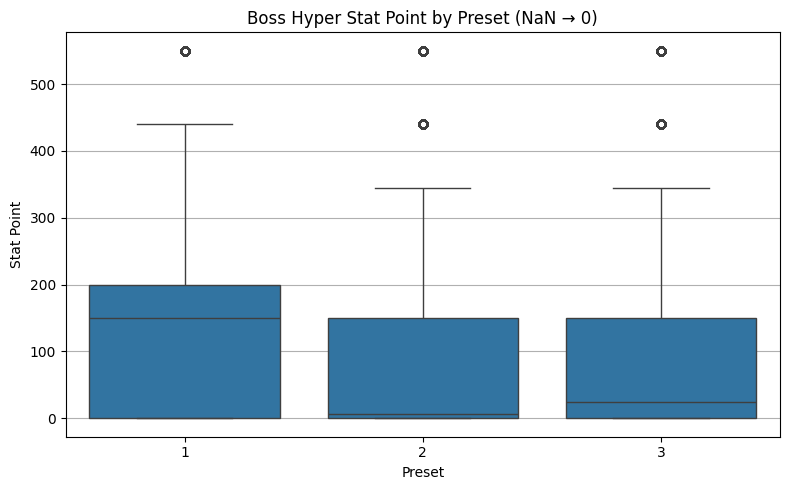

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_boss_hyper.fillna(0), x="preset_number", y="stat_point")
plt.title("Boss Hyper Stat Point by Preset (NaN → 0)")
plt.xlabel("Preset")
plt.ylabel("Stat Point")
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

--------
#### 어빌리티 관련 결론

🔎 검정 결과 요약
- 카이제곱 독립성 검정 통계량: 28,078.88
- p-value: 0.0000
- 자유도: 2
- Cramér's V: 0.4513 → 중간 정도의 효과 크기

➡️ 프리셋 번호와 보스 관련 어빌리티 포함 여부 간에 통계적으로 유의미한 차이가 있음 <br>
➡️ 실질적인 차이 또한 뚜렷함 (Cramér’s V 기준으로 분명한 분포 차이 존재)

<br>

📊 보스 어빌리티 분포 <br>
✔ 보스 어빌리티 포함 여부 (실제 vs 기대 교차표) <br>
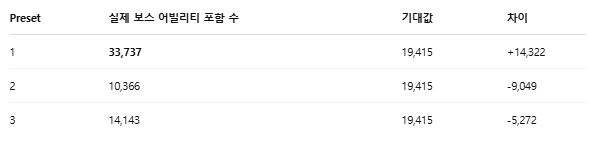 <br>
→ 1번 프리셋에 보스 어빌리티가 특히 집중되어 있음

<br>

✔ 보스 어빌리티의 등급별 분포 <br>
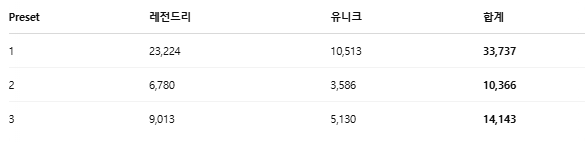 <br>
→ 레전드리 기준에서도 1번 프리셋이 다른 프리셋보다 2~3배 이상 많음

<br>

📌 해석 및 결론 <br>
보스 관련 어빌리티 분석 결과,
프리셋 1번에 보스 어빌리티가 집중되는 경향이 매우 뚜렷하게 나타났고,
이는 장비나 하이퍼스탯에서는 관측되지 않았던 실질적인 분포 차이를 보인다.
- 카이제곱 검정은 유의미한 분포 차이를 통계적으로 입증했고,
- Cramér's V = 0.4513으로 중간 정도의 효과 크기 또한 확인됨.
- 어빌리티의 레전드리 등급에서 보스 옵션 등장 비율 역시 프리셋 1번이 압도적으로 높음.

따라서 “프리셋 1번이 보스셋으로 구성될 가능성이 높다”는 가설은, 어빌리티가 기준일 때 가장 강력하게 지지된다.



In [ ]:
ability_df["is_boss_ability_line"] = ability_df["ability_value"].str.contains("보스", na=False).astype(int)

# 보공 어빌리티가 하나라도 있으면 1로 설정
preset_boss_ability = (
    ability_df.groupby(["nickname", "preset_number"])["is_boss_ability_line"]
    .max()
    .reset_index()
    .rename(columns={"is_boss_ability_line": "has_boss_ability"})
)

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

ct = pd.crosstab(preset_boss_ability["preset_number"], preset_boss_ability["has_boss_ability"])
chi2, p, dof, expected = chi2_contingency(ct)
expected_df = pd.DataFrame(expected, index=ct.index, columns=ct.columns)

print("=== 카이제곱 검정 결과 ===")
print("통계량:", round(chi2, 4))
print("p-value:", round(p, 4))
print("자유도:", dof)
print("\n예상 교차표 (Expected counts):\n", expected_df.round(1))
print("\n실제 교차표:\n", ct)

# 해석
if p < 0.05:
    print("\n→ 유의미한 차이가 있음! (프리셋별 보스 공략용 어빌리티 구성에 차이가 있음)")
else:
    print("\n→ 유의미한 차이가 없음 (프리셋별 구성은 우연일 수 있음)")

=== 카이제곱 검정 결과 ===
통계량: 28078.8836
p-value: 0.0
자유도: 2

예상 교차표 (Expected counts):
 has_boss_ability        0        1
preset_number                     
1                 26531.7  19415.3
2                 26531.7  19415.3
3                 26531.7  19415.3

실제 교차표:
 has_boss_ability      0      1
preset_number                 
1                 12210  33737
2                 35581  10366
3                 31804  14143

→ 유의미한 차이가 있음! (프리셋별 보스 공략용 어빌리티 구성에 차이가 있음)


In [ ]:
# Cramér's V 계산
n = ct.sum().sum()
min_dim = min(ct.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.4513


In [ ]:
# 보스 관련 어빌리티만 필터링
df_boss_ability = ability_df[
    ability_df["ability_value"].str.contains("보스", na=False)
]

# 프리셋별 + 등급별 개수 집계
grade_order = ["레전드리", "유니크"]
preset_grade_counts = (
    df_boss_ability.groupby(["preset_number", "ability_grade"])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=grade_order, fill_value=0)
)

print(preset_grade_counts)

ability_grade   레전드리    유니크
preset_number              
1              23224  10513
2               6780   3586
3               9013   5130


In [ ]:
# 보스셋 여부 포함된 어빌리티 요약 DataFrame에서 보스셋인 것만 추출
bossset_only = preset_boss_ability[preset_boss_ability["has_boss_ability"] == 1]

# 프리셋별 비율 계산 (보스셋일 때 preset_number가 몇 번인지)
preset_distribution = (
    bossset_only["preset_number"]
    .value_counts(normalize=True)
    .sort_index()
    .round(4) * 100
)

print("💡보스셋일 때 프리셋 번호 분포 (%):")
print(preset_distribution)

💡보스셋일 때 프리셋 번호 분포 (%):
preset_number
1    57.92
2    17.80
3    24.28
Name: proportion, dtype: float64


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 종속변수: 프리셋이 1인지 여부
preset_boss_ability["is_preset1"] = (preset_boss_ability["preset_number"] == 1).astype(int)

# 로지스틱 회귀 모델: 보스셋 여부로 프리셋1일 확률 예측
model = smf.logit("is_preset1 ~ has_boss_ability", data=preset_boss_ability).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.535041
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             is_preset1   No. Observations:               137841
Model:                          Logit   Df Residuals:                   137839
Method:                           MLE   Df Model:                            1
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                  0.1594
Time:                        12:23:45   Log-Likelihood:                -73751.
converged:                       True   LL-Null:                       -87738.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.7082      0.010   -173.671      0.000      -1.727      -1.689
has_boss_ab

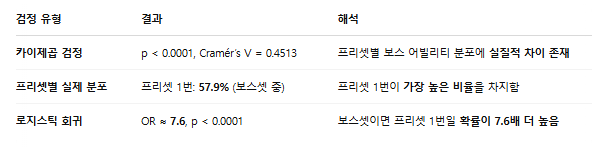

→ 프리셋 1번은 보스셋으로 설정되는 경향이 유의미하게 높다는 가설은 통계적으로 채택된다. 어빌리티 기준에서 1번 프리셋은 보스 관련 옵션이 집중되어 있었으며, 로지스틱 회귀 결과에서도 보스 어빌리티가 포함된 경우 프리셋 1일 확률이 약 7.6배 더 높은 것으로 나타났다.

--------
#### 링크스킬 관련 결론

🔎 검정 결과 요약 <br>
- 카이제곱 독립성 검정 통계량: 2,093.73
- p-value: 0.0000
- 자유도: 2
- Cramér’s V: 0.1299 → 약한 정도의 효과 크기

➡️ 프리셋 번호와 보스 관련 링크스킬 설정 여부 간에 통계적으로 유의미한 차이가 있음 <br>
➡️ 프리셋별 링크스킬 구성에서 실제로도 일정한 분포 차이가 존재함

<br>

📊 보스 링크스킬 분포 <br>
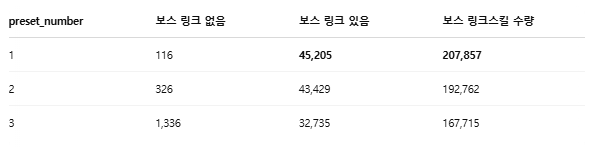 <br>
✔ 기대값 대비 비교:
- 프리셋 1번은 보스 링크스킬을 가장 많이 설정한 캐릭터 수도 가장 많을 뿐 아니라,
- 설정된 보스 링크스킬의 총 개수(207,857개) 또한 다른 프리셋에 비해 가장 많음
- 이는 프리셋 1번이 보스전 중심 구성이라는 경향성을 수량적으로도 뒷받침해줌

<br>

📌 해석 및 결론 <br>
보스 공략용 링크스킬(소울 컨트랙트, 데몬스 퓨리 등 6종)을 기준으로 프리셋별 구성을 분석한 결과, 프리셋 1번에 보스 공략용 링크스킬을 가장 많이 설정하는 경향이 나타난다.

- 유저들이 프리셋 1번을 보스전 중심 구성으로 활용하는 경향을 보이고 있으며,
- 다른 프리셋(특히 3번)은 상대적으로 보스 대비 활용도가 낮음을 의미한다.

**따라서 "1번 프리셋은 보스셋이다"는 가설은, 링크스킬이 기준일 때 일정 부분 지지된다.**





In [ ]:
# linkskill 데이터 모두 불러오기
# "equipment"(item), "hyper_stat", "ability","union_data"(union), "linkskill"

# 상위 폴더 경로
root_dir = "/content/drive/MyDrive/data/linkskill" # 수정

# 하위 모든 CSV 탐색
all_csv_files = glob.glob(os.path.join(root_dir, "*/*.csv"))

df_list = []
for file in all_csv_files:
    df = pd.read_csv(file)
    folder_name = os.path.basename(os.path.dirname(file))
    job_file = os.path.basename(file).replace("_linkskill.csv", "") # 수정
    df["job_group"] = folder_name
    df_list.append(df)

# 전체 통합
linkskill_df = pd.concat(df_list, ignore_index=True) # 수정

In [ ]:
from scipy.stats import chi2_contingency

# 🎯 보스 관련 링크스킬 목록
target_skills = [
    "소울 컨트랙트", "데몬스 퓨리", "판단",
    "와일드 레이지", "임피리컬 널리지", "무아"
]

# 타겟 링크스킬 필터링
df_target_skills = linkskill_df[linkskill_df["skill_name"].isin(target_skills)]

# 캐릭터별+프리셋별 보스 링크스킬 포함 여부 (1개라도 있으면 1)
has_boss_link = (
    df_target_skills.groupby(["nickname", "preset_number"])
    .size()
    .reset_index(name="boss_linkskill_count")
)
has_boss_link["has_boss_link"] = 1  # 하나라도 포함됐다는 뜻

# 전체 캐릭터+프리셋 구성에 대해 보스 링크 여부 병합
preset_all = linkskill_df[["nickname", "preset_number"]].drop_duplicates()
preset_with_flag = pd.merge(preset_all, has_boss_link[["nickname", "preset_number", "has_boss_link"]],
                            on=["nickname", "preset_number"], how="left")
preset_with_flag["has_boss_link"] = preset_with_flag["has_boss_link"].fillna(0).astype(int)

# 교차표: 프리셋 vs 보스 링크스킬 포함 여부
ct = pd.crosstab(preset_with_flag["preset_number"], preset_with_flag["has_boss_link"])

# 카이제곱 검정 + Cramér's V 계산
chi2, p, dof, expected = chi2_contingency(ct)
cramers_v = np.sqrt(chi2 / (ct.sum().sum() * (min(ct.shape) - 1)))

# 출력
print("=== 카이제곱 검정 결과 ===")
print(f"카이제곱 통계량: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"자유도: {dof}")
print("실제 교차표:\n", ct)
print("\n예상 교차표:\n", pd.DataFrame(expected, index=ct.index, columns=ct.columns).round(1))

# 해석
if p < 0.05:
    print("\n→ 유의미한 차이가 있음! (프리셋별 보스 공략용 링크스킬 구성에 차이가 있음)")
else:
    print("\n→ 유의미한 차이가 없음 (프리셋별 구성은 우연일 수 있음)")

=== 카이제곱 검정 결과 ===
카이제곱 통계량: 2093.7262
p-value: 0.0000
자유도: 2
실제 교차표:
 has_boss_link     0      1
preset_number             
1               116  45205
2               326  44329
3              1336  32735

예상 교차표:
 has_boss_link      0        1
preset_number                
1              649.6  44671.4
2              640.1  44014.9
3              488.3  33582.7

→ 유의미한 차이가 있음! (프리셋별 보스 공략용 링크스킬 구성에 차이가 있음)


In [ ]:
print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.3800


In [ ]:
preset_skill_counts = (
    df_target_skills.groupby("preset_number")["skill_name"]
    .count()
    .reset_index(name="boss_linkskill_count")
)
print("\n프리셋별 보스 링크스킬 설정 수:\n", preset_skill_counts)


프리셋별 보스 링크스킬 설정 수:
    preset_number  boss_linkskill_count
0              1                207857
1              2                192762
2              3                167715


--------
#### 유니온 관련 결론
📌 해석 및 결론 <br>
프리셋 1번과 2번은 보스 유니온 설정 비율이 97% 이상으로 매우 높으며, 프리셋 3번은 상대적으로 낮은 71% 수준에 그친다. <br>
이는 프리셋 1, 2번이 보스 공략용으로 활용되고 있음을 보여주며, 3번은 다른 용도로 구성되는 경향이 있음으로 해석할 수 있다.

In [ ]:
# union/union_data 데이터 모두 불러오기
# "equipment"(item), "hyper_stat", "ability","union_data"(union), "linkskill"

# 상위 폴더 경로
root_dir = "/content/drive/MyDrive/data/union" # 수정

# 하위 모든 CSV 탐색
all_csv_files = glob.glob(os.path.join(root_dir, "*/*.csv"))

df_list = []
for file in all_csv_files:
    df = pd.read_csv(file)
    folder_name = os.path.basename(os.path.dirname(file))
    job_file = os.path.basename(file).replace("_union_data.csv", "") # 수정
    df["job_group"] = folder_name
    df_list.append(df)

# 전체 통합
union_df = pd.concat(df_list, ignore_index=True) # 수정

In [ ]:
union_df

,nickname,world,level,job,subclass,union_level,union_grade,union_artifact_level,union_rader_preset1_stat,union_rader_preset1_occupied,...,crystal_8_opt2,crystal_8_opt3,champion_preset_1_badges,champion_preset_2_badges,champion_preset_3_badges,artifact_effect_파이널 어택류 스킬의 데미지 증가,artifact_effect_상태 이상 내성 증가,artifact_effect_소환수 지속시간 증가,artifact_effect_최대 HP 최대 MP 증가,job_group
0,캡스,크로아,295,기사단,미하일,9493.0,그랜드 마스터 유니온 3,55.0,"상태 이상 내성 4 증가, INT 80 증가, STR 80 증가, 공격력/마력 20...","최대 HP 250 증가, STR 50 증가, 크리티컬 데미지 20.00% 증가, D...",...,버프 지속시간 증가,크리티컬 확률 증가,"올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...",NaN,NaN,NaN,NaN,NaN,NaN,전사
1,쥬히,엘리시움,294,기사단,미하일,10727.0,슈프림 유니온 1,56.0,"INT 100 증가, INT 100 증가, 공격력/마력 25 증가, 방어율 무시 6...","마력 1 증가, STR 75 증가, 크리티컬 데미지 20.00% 증가, DEX 5 ...",...,버프 지속시간 증가,크리티컬 확률 증가,"올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...","올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...","올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가",NaN,NaN,NaN,NaN,전사
2,부도,스카니아,294,기사단,미하일,9813.0,그랜드 마스터 유니온 4,56.0,"STR 80 증가, 공격력/마력 20 증가, 최대 HP 2500 증가, STR 10...","DEX 5 증가, STR 75 증가, 크리티컬 데미지 20.00% 증가, 획득 경험...",...,메소 획득량 증가,공격력/마력 증가,"올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...","올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...","올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가",10.0,NaN,NaN,NaN,전사
3,일선에서,스카니아,293,기사단,미하일,9670.0,그랜드 마스터 유니온 4,53.0,"크리티컬 확률 5% 증가, 공격 시 20%의 확률로 데미지 20% 증가, 최대 HP...","버프 지속시간 40% 증가, 최대 HP 250 증가, STR 25 증가, 크리티컬 ...",...,공격력/마력 증가,버프 지속시간 증가,"올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...","올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가","올스탯 20, 최대 HP/MP 1000 증가",NaN,NaN,NaN,NaN,전사
4,와락,베라,293,기사단,미하일,9505.0,그랜드 마스터 유니온 4,55.0,"LUK 80 증가, INT 80 증가, STR 100 증가, 경험치 획득량 12% ...","STR 75 증가, 크리티컬 데미지 20.00% 증가, DEX 5 증가, 공격력 1...",...,버프 지속시간 증가,메소 획득량 증가,"올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...","올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가, 보스 몬스터...","올스탯 20, 최대 HP/MP 1000 증가",NaN,NaN,NaN,NaN,전사
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45983,김깜몬,베라,282,루미너스,루미너스,8797.0,그랜드 마스터 유니온 1,46.0,"DEX 80 증가, INT 100 증가, 최대 HP 2000 증가, DEX 80 증...","크리티컬 데미지 20.00% 증가, STR 5 증가, DEX 5 증가, 크리티컬 확...",...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,마법사
45984,트리트민,루나,282,루미너스,루미너스,8799.0,그랜드 마스터 유니온 1,45.0,"경험치 획득량 10% 증가, DEX 80 증가, 메소 획득량 4% 증가, INT 8...","버프 지속시간 15% 증가, 최대 HP 250 증가, 크리티컬 데미지 20.00% ...",...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,마법사
45985,노른판타지,엘리시움,282,루미너스,루미너스,8917.0,그랜드 마스터 유니온 2,49.0,"스킬 재사용 대기시간 5% 감소, INT 100 증가, 메소 획득량 4% 증가, 경...","크리티컬 데미지 20.00% 증가, 마력 5 증가, 크리티컬 확률 7% 증가, 버프...",...,NaN,NaN,"올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가",NaN,NaN,NaN,NaN,NaN,5.0,마법사
45986,쑤쟐,루나,282,루미너스,루미너스,9905.0,그랜드 마스터 유니온 4,50.0,"STR 100 증가, 버프 지속시간 20% 증가, 최대 MP 6% 증가, STR 8...","상태 이상 내성 1 증가, DEX 5 증가, 크리티컬 데미지 20.00% 증가, 획...",...,크리티컬 확률 증가,메소 획득량 증가,"올스탯 20, 최대 HP/MP 1000 증가, 공격력/마력 10 증가","올스탯 20, 최대 HP/MP 1000 증가",NaN,NaN,NaN,NaN,NaN,마법사


In [ ]:
from scipy.stats import chi2_contingency

# 🎯 유니온 프리셋별 보스 키워드 포함 여부 (공격대 효과 + 점령 효과)

# 분석 대상 컬럼
stat_cols = [
    "union_rader_preset1_stat", "union_rader_preset2_stat", "union_rader_preset3_stat"
]

occupied_cols = [
    "union_rader_preset1_occupied", "union_rader_preset2_occupied", "union_rader_preset3_occupied"
]

# 보스 키워드 포함 여부를 프리셋별로 판단 (0 or 1)
df_union_flags = []

for i in [1, 2, 3]:
    has_boss_stat = union_df[f"union_rader_preset{i}_stat"].astype(str).str.contains("보스", na=False).astype(int)
    has_boss_occupied = union_df[f"union_rader_preset{i}_occupied"].astype(str).str.contains("보스", na=False).astype(int)

    df_union_flags.append(pd.DataFrame({
        "preset_number": i,
        "has_boss_union": (has_boss_stat | has_boss_occupied)  # 하나라도 포함되면 1
    }))

# 프리셋별 보스 키워드 포함 여부 통합
df_union_bossset = pd.concat(df_union_flags, ignore_index=True)

In [ ]:
# 교차표 및 검정
ct = pd.crosstab(df_union_bossset["preset_number"], df_union_bossset["has_boss_union"])
chi2, p, dof, expected = chi2_contingency(ct)
cramers_v = np.sqrt(chi2 / (ct.sum().sum() * (min(ct.shape) - 1)))

# 출력
print("=== 카이제곱 검정 결과 ===")
print(f"카이제곱 통계량: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"자유도: {dof}")

print("실제 교차표:\n", ct)
print("\n예상 교차표:\n", pd.DataFrame(expected, index=ct.index, columns=ct.columns).round(1))

# 해석
if p < 0.05:
    print("\n→ 유의미한 차이가 있음! (프리셋별 보스 공략용 유니온 구성에 차이가 있음)")
else:
    print("\n→ 유의미한 차이가 없음 (프리셋별 구성은 우연일 수 있음)")

=== 카이제곱 검정 결과 ===
카이제곱 통계량: 19926.3755
p-value: 0.0000
자유도: 2
실제 교차표:
 has_boss_union      0      1
preset_number               
1                1038  44950
2                1590  44398
3               13081  32907

예상 교차표:
 has_boss_union       0        1
preset_number                  
1               5236.3  40751.7
2               5236.3  40751.7
3               5236.3  40751.7

→ 유의미한 차이가 있음! (프리셋별 보스 공략용 유니온 구성에 차이가 있음)


In [ ]:
print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.3800


### 2. 장비-스탯 관련(전체) - 추론통계

**상관계수는 낮지만, 통계적으로 유의미한 수준의 양의 상관관계가 존재 (p < 0.001)**

이는 자본이 높을수록 하이퍼스탯을 여러 항목에 분산하여 찍는 경향이 소폭 증가함을 시사하며, “무자본/중자본보다 고자본이 더 다양한 스탯을 선택할 것이다.”라는 가설을 일정 부분 뒷받침하는 결과로 해석할 수 있다.

**다만, 강한 상관관계는 아니기에 자본 수준만으로 이 경향을 명확히 설명하긴 어렵다. 다른 변수들(직업군, 유저 스타일 등)도 함께 고려할 필요가 있다.**

In [ ]:
from scipy.stats import pearsonr, spearmanr

# 결측 제거
df_corr = result_df_all[["investment_index", "stat_point_std"]].dropna()

# Pearson (선형)
pearson_corr, pearson_p = pearsonr(df_corr["investment_index"], df_corr["stat_point_std"])

# Spearman (순위)
spearman_corr, spearman_p = spearmanr(df_corr["investment_index"], df_corr["stat_point_std"])

# 출력
print("=== 상관분석 결과 ===")
print(f"📉 Pearson:  r = {pearson_corr:.3f}, p = {pearson_p:.4f}")
print(f"📈 Spearman: r = {spearman_corr:.3f}, p = {spearman_p:.4f}")

=== 상관분석 결과 ===
📉 Pearson:  r = 0.148, p = 0.0000
📈 Spearman: r = 0.161, p = 0.0000
